# **EDA**

In [ ]:
train_tr = reduce_mem_usage(pd.read_csv(r'./ML/Shareddrives/NCKH2021/Data/Original_data/train_transaction.csv'))
train_id = reduce_mem_usage(pd.read_csv(r'./ML/Shareddrives/NCKH2021/Data/Original_data/train_identity.csv'))
# test_id = reduce_mem_usage(pd.read_csv(r'./ML/Shareddrives/NCKH2021/Data/Original_data/test_identity.csv'))
# test_tr = reduce_mem_usage(pd.read_csv(r'./ML/Shareddrives/NCKH2021/Data/Original_data/test_transaction.csv'))

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [ ]:
percent_missing = train_id.isnull().sum() * 100 / len(train_id)
missing_value_df = pd.DataFrame({'column_name': train_id.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df[missing_value_df['percent_missing'] > 90]

column_name  percent_missing
id_23       id_23        96.416215
id_27       id_27        96.416215
id_22       id_22        96.416215
id_26       id_26        96.420375
id_21       id_21        96.423149
id_08       id_08        96.425922
id_07       id_07        96.425922
id_25       id_25        96.441868
id_24       id_24        96.708798

In [ ]:
new_cols = [x.replace('-', '_') for x in test_id.columns if 'id' in x]
test_id.rename(columns=dict(zip([x for x in test_id.columns if 'id' in x], new_cols)), inplace=True)

In [ ]:
train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float16(332), float32(44), int16(1), int32(2), int8(1), object(14)
memory usage: 542.3+ MB


In [ ]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int32  
 1   id_01          144233 non-null  float16
 2   id_02          140872 non-null  float32
 3   id_03          66324 non-null   float16
 4   id_04          66324 non-null   float16
 5   id_05          136865 non-null  float16
 6   id_06          136865 non-null  float16
 7   id_07          5155 non-null    float16
 8   id_08          5155 non-null    float16
 9   id_09          74926 non-null   float16
 10  id_10          74926 non-null   float16
 11  id_11          140978 non-null  float16
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float16
 14  id_14          80044 non-null   float16
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
# train_id = train_id.merge(train_tr[['TransactionID', 'TransactionDT', 'isFraud']], on=['TransactionID'])

Size of data set:
- Train_transaction: (590540, 394)
- Train_identity: (144233, 41)
- Test_transaction: (506691, 393)
- Test_identity: (141907, 41)

=> All transactionID in train_transaction are in train_identity
Encode data:
- TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
- card4: card category; card6: card type
- addr1: billing region
- addr2: billing country
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. Also these are for both purchaser and recipient, which doubles the number.
C13: cumulative count
- D1: days since client begin thier first transaction
D3: days to the last transaction
Dxx: timedelta, such as days between previous transaction, etc.
- M1-M9 (categorical data): match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations. “For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc. Some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking)."
- device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. id_?: network connection information (IP (id19, id20), ISP, Proxy, etc); id_31: digital signature (UA/browser/os/version, etc) associated with transactions.

In [ ]:
train_id.head()

TransactionID  id_01  ...  TransactionDT  isFraud
0        2987004   -inf  ...          86506        0
1        2987008    NaN  ...          86535        0
2        2987010    NaN  ...          86549        0
3        2987011    NaN  ...          86555        0
4        2987016   -inf  ...          86620        0

[5 rows x 43 columns]

In [ ]:
for i in [train_tr, train_id, test_tr, test_id]:
  print(f'There are {i.isnull().any().sum()} columns with missing values.')
  print(i.nunique())
  print("----------------------------------")

There are 374 columns with missing values.
TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt      2516
ProductCD              5
                   ...  
V335                 669
V336                 355
V337                 254
V338                 380
V339                 334
Length: 394, dtype: int64
----------------------------------
There are 38 columns with missing values.
TransactionID    144233
id_01                77
id_02            115655
id_03                24
id_04                15
id_05                93
id_06               101
id_07                84
id_08                94
id_09                46
id_10                62
id_11               146
id_12                 2
id_13                54
id_14                25
id_15                 3
id_16                 2
id_17               104
id_18                18
id_19               522
id_20               394
id_21               490
id_22                25
id_23                 3
id_

In [ ]:
train_tr['TransactionAmt'] = train_tr['TransactionAmt'].apply(np.log)

In [ ]:
import plotly.express as px
k = train_tr.groupby(['TransactionAmt', 'isFraud']).apply(lambda x: x['TransactionAmt'].count()).reset_index(name='Count')
fig = px.line(k, x='TransactionAmt', y='Count', color='isFraud', width=600, height=500)
fig.show()

lst_tr = ['ProductCD','card4','card6', 'P_emaildomain', 'R_emaildomain', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
for i in lst_tr:
    k = train_tr.groupby([i,'isFraud']).apply(lambda x: x[i].count()).reset_index(name='Count')
    print(k)
    fig = px.bar(k, x=i, y='Count', color='isFraud', width=600, height=500)
    fig.update_traces(width=.4)
    fig.show()
id_group = ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'DeviceType', 'DeviceInfo']
id = ['id_3' + str(x) for x in range(0, 9) if x != 2]
id += id_group
for i in id:
  k = train_id.groupby([i,'isFraud']).apply(lambda x: x[i].count()).reset_index(name='Count')
  print(k)
  fig = px.bar(k, x=i, y='Count', color='isFraud', width=600, height=500)
  fig.update_traces(width=.4)
  fig.show()

  ProductCD  isFraud   Count
0         C        0   60511
1         C        1    8008
2         H        0   31450
3         H        1    1574
4         R        0   36273
5         R        1    1426
6         S        0   10942
7         S        1     686
8         W        0  430701
9         W        1    8969


              card4  isFraud   Count
0  american express        0    8089
1  american express        1     239
2          discover        0    6137
3          discover        1     514
4        mastercard        0  182721
5        mastercard        1    6496
6              visa        0  371394
7              visa        1   13373


             card6  isFraud   Count
0      charge card        0      15
1           credit        0  139036
2           credit        1    9950
3            debit        0  429264
4            debit        1   10674
5  debit or credit        0      30


     P_emaildomain  isFraud  Count
0          aim.com        0    275
1          aim.com        1     40
2    anonymous.com        0  36139
3    anonymous.com        1    859
4          aol.com        0  27672
..             ...      ...    ...
96        yahoo.es        1      2
97        yahoo.fr        0    138
98        yahoo.fr        1      5
99       ymail.com        0   2346
100      ymail.com        1     50

[101 rows x 3 columns]


    R_emaildomain  isFraud  Count
0         aim.com        0     35
1         aim.com        1      1
2   anonymous.com        0  19931
3   anonymous.com        1    598
4         aol.com        0   3572
..            ...      ...    ...
87       yahoo.es        1      2
88       yahoo.fr        0    132
89       yahoo.fr        1      5
90      ymail.com        0    199
91      ymail.com        1      8

[92 rows x 3 columns]


   M4  isFraud   Count
0  M0        0  189207
1  M0        1    7198
2  M1        0   51397
3  M1        1    1429
4  M2        0   53056
5  M2        1    6809


  M1  isFraud   Count
0  F        0      25
1  T        0  313073
2  T        1    6342


  M2  isFraud   Count
0  F        0   32788
1  F        1    1184
2  T        0  280310
3  T        1    5158


  M3  isFraud   Count
0  F        0   65660
1  F        1    2049
2  T        0  247438
3  T        1    4293


  M5  isFraud   Count
0  F        0  128977
1  F        1    3514
2  T        0  103512
3  T        1    4055


  M6  isFraud   Count
0  F        0  222459
1  F        1    5397
2  T        0  190029
3  T        1    3295


  M7  isFraud   Count
0  F        0  207285
1  F        1    4089
2  T        0   32173
3  T        1     728


  M8  isFraud   Count
0  F        0  151878
1  F        1    3373
2  T        0   87593
3  T        1    1444


  M9  isFraud   Count
0  F        0   37473
1  F        1    1159
2  T        0  201998
3  T        1    3658


             id_30  isFraud  Count
0          Android        0    965
1          Android        1    114
2    Android 4.4.2        0     47
3    Android 4.4.2        1     16
4      Android 5.0        0     41
..             ...      ...    ...
129     iOS 11.4.1        0      1
130      iOS 9.3.5        0    407
131      iOS 9.3.5        1      7
132          other        0      6
133          other        1      9

[134 rows x 3 columns]


                       id_31  isFraud  Count
0                   BLU/Dash        0      1
1                     Cherry        0      1
2            Generic/Android        0     50
3            Generic/Android        1      7
4        Generic/Android 7.0        0     65
..                       ...      ...    ...
222  samsung browser generic        0    181
223  samsung browser generic        1     29
224                seamonkey        0      1
225                     silk        0     19
226                 waterfox        0      2

[227 rows x 3 columns]


        id_33  isFraud  Count
0         0x0        0      3
1         0x0        1      3
2    1023x767        0      3
3    1023x768        0      7
4    1024x552        1      8
..        ...      ...    ...
308   921x691        0      1
309   960x540        0     54
310   960x540        1      4
311   960x640        0     12
312   976x600        0      1

[313 rows x 3 columns]


             id_34  isFraud  Count
0  match_status:-1        0      3
1   match_status:0        0    394
2   match_status:0        1     21
3   match_status:1        0  16270
4   match_status:1        1   1106
5   match_status:2        0  57653
6   match_status:2        1   2358


  id_35  isFraud  Count
0     F        0  55426
1     F        1   7745
2     T        0  74337
3     T        1   3477


  id_36  isFraud   Count
0     F        0  123088
1     F        1   10978
2     T        0    6675
3     T        1     244


  id_37  isFraud   Count
0     F        0   28513
1     F        1    2020
2     T        0  101250
3     T        1    9202


  id_38  isFraud  Count
0     F        0  66693
1     F        1   7229
2     T        0  63070
3     T        1   3993


      id_12  isFraud   Count
0     Found        0   19939
1     Found        1    1269
2  NotFound        0  112976
3  NotFound        1   10049


     id_15  isFraud  Count
0    Found        0  60610
1    Found        1   7118
2      New        0  58578
3      New        1   3034
4  Unknown        0  10575
5  Unknown        1   1070


      id_16  isFraud  Count
0     Found        0  59212
1     Found        1   7112
2  NotFound        0  59976
3  NotFound        1   3040


   id_28  isFraud  Count
0  Found        0  68399
1  Found        1   7833
2    New        0  61361
3    New        1   3385


      id_29  isFraud  Count
0     Found        0  67099
1     Found        1   7827
2  NotFound        0  62661
3  NotFound        1   3391


  DeviceType  isFraud  Count
0    desktop        0  79611
1    desktop        1   5554
2     mobile        0  49988
3     mobile        1   5657


          DeviceInfo  isFraud  Count
0              0PAJ5        0      1
1              0PJA2        0      1
2              0PM92        0      2
3              0PM92        1      2
4              1016S        0      1
...              ...      ...    ...
2155   verykools5004        0      2
2156   verykools5034        0      1
2157   verykools5035        0      1
2158            vivo        0      5
2159  xs-Z47b7VqTMxs        0      1

[2160 rows x 3 columns]


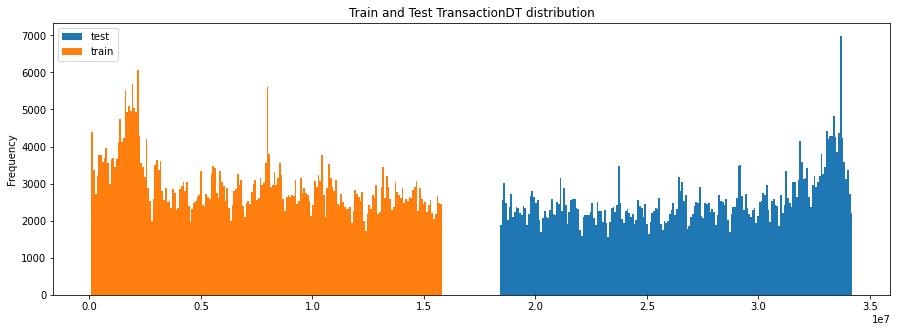

In [ ]:
test_tr['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='test', bins=200, title='Train and Test TransactionDT distribution')
train_tr['TransactionDT'].plot(kind='hist', label='train', bins=200)
plt.legend()
plt.show()

-5.0     0.569703
 0.0     0.135579
-10.0    0.078047
-20.0    0.077728
-15.0    0.039339
Name: id_01, dtype: float64
-47.0    0.000007
-54.0    0.000007
-86.0    0.000007
-28.0    0.000007
-57.0    0.000007
Name: id_01, dtype: float64


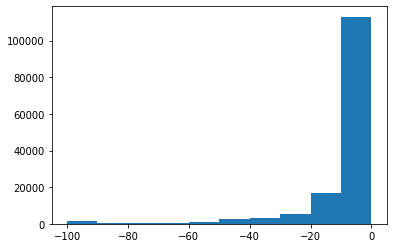

-------------------------------------
NaN       0.023303
1102.0    0.000076
696.0     0.000069
1116.0    0.000062
1117.0    0.000062
Name: id_02, dtype: float64
171227.0    0.000007
171228.0    0.000007
342457.0    0.000007
128226.0    0.000007
81155.0     0.000007
Name: id_02, dtype: float64


-------------------------------------
NaN    0.540161
0.0    0.443054
1.0    0.005983
3.0    0.004631
2.0    0.002919
Name: id_03, dtype: float64
 9.0     0.000021
-13.0    0.000021
-12.0    0.000021
 10.0    0.000007
 8.0     0.000007
Name: id_03, dtype: float64


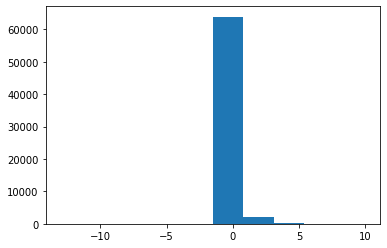

-------------------------------------
 NaN    0.540161
 0.0    0.455783
-5.0    0.000915
-6.0    0.000679
-8.0    0.000444
Name: id_04, dtype: float64
-13.0    0.000166
-7.0     0.000146
-2.0     0.000104
-3.0     0.000069
-28.0    0.000014
Name: id_04, dtype: float64


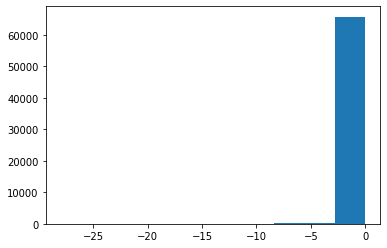

-------------------------------------
0.0    0.643008
1.0    0.057497
NaN    0.051084
2.0    0.034229
3.0    0.026721
Name: id_05, dtype: float64
-34.0    0.000007
-38.0    0.000007
-44.0    0.000007
 48.0    0.000007
-39.0    0.000007
Name: id_05, dtype: float64


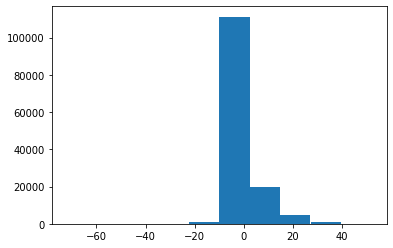

-------------------------------------
 0.0    0.633177
 NaN    0.051084
-1.0    0.032496
-5.0    0.026686
-6.0    0.022582
Name: id_06, dtype: float64
-93.0    0.000028
-80.0    0.000014
-95.0    0.000014
-89.0    0.000007
-99.0    0.000007
Name: id_06, dtype: float64


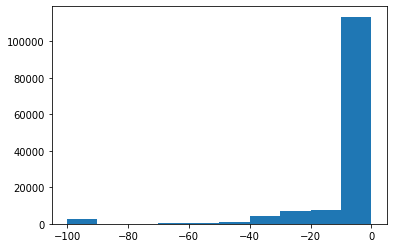

-------------------------------------
NaN     0.964259
0.0     0.002836
16.0    0.001699
14.0    0.001581
12.0    0.001442
Name: id_07, dtype: float64
 61.0    0.000007
-15.0    0.000007
 51.0    0.000007
-33.0    0.000007
-37.0    0.000007
Name: id_07, dtype: float64


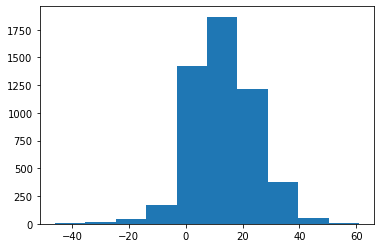

-------------------------------------
 NaN      0.964259
-100.0    0.003467
 0.0      0.001810
-34.0     0.001782
-33.0     0.001449
Name: id_08, dtype: float64
-93.0    0.000007
-98.0    0.000007
-65.0    0.000007
-97.0    0.000007
-90.0    0.000007
Name: id_08, dtype: float64


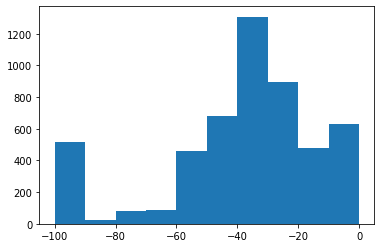

-------------------------------------
0.0    0.487947
NaN    0.480521
1.0    0.011204
3.0    0.006697
2.0    0.005359
Name: id_09, dtype: float64
-14.0    0.000007
-20.0    0.000007
 25.0    0.000007
-30.0    0.000007
 17.0    0.000007
Name: id_09, dtype: float64


-------------------------------------


In [ ]:
id = [x for x in test_id.columns if 'id_0' in x]
for i in id:
  print(train_id[i].value_counts(dropna=False, normalize=True).head())
  print(train_id[i].value_counts(dropna=False, normalize=True).tail())
  plt.hist(train_id[i])
  plt.show()
  print("-------------------------------------")

In [ ]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
# test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

In [ ]:
train.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   
5        2987005        0          86510            49.0         W   5937   
6        2987006        0          86522           159.0         W  12308   
7        2987007        0          86529           422.5         W  12695   
8        2987008        0          86535            15.0         H   2803   
9        2987009        0          86536           117.0         W  17399   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   
5  555.0  150.0        visa  226.0  ...                  NaN    NaN   
6  360.0  150.0        visa  166.0  ...                  NaN    NaN   
7  490.0  150.0        visa  226.0  ...                  NaN    NaN   
8  100.0  150.0        visa  226.0  ...   mobile safari 11.0   32.0   
9  111.0  150.0  mastercard  224.0  ...                  NaN    NaN   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   
5        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
6        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
7        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
8   1334x750  match_status:1      T     F     F      T      mobile   
9        NaN             NaN    NaN   NaN   NaN    NaN         NaN   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  
5                            NaN  
6                            NaN  
7                            NaN  
8                     iOS Device  
9                            NaN  

[10 rows x 434 columns]

In [ ]:
a = train['isFraud'].sum()/len(train['isFraud'])*100
print('Percentage of fraud in dataset: %1.3f' %a + "%")

Percentage of fraud in dataset: 3.499%


In [ ]:
import plotly.graph_objs as go

fig = go.Figure(go.Pie(labels=['isFraud=0', 'isFraud=1'], values=train['isFraud'].value_counts(), textfont=dict(size=15), 
               opacity=0.8, marker=dict(colors=['lightblue','black'], line=dict(color='#000000', width=1))))

fig.update_layout(title={'text':'Distribution of Fraud Transaction', 'x':0.49, 'y':0.9, 'xanchor':'center', 'yanchor':'top'},
                 legend={'x':0.88, 'y':0.7, 'xanchor':'right', 'yanchor':'top'})     

fig.show() 

In [ ]:
p = [a, 100-a]
plt.pie(p, labels=['Fraud', 'noFraud'], startangle=0, explode=[0.2, 0], autopct='%1.1f%%', pctdistance=1.3, labeldistance=0.35)
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
train['TransactionDT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
# test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
train['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes).set_xlabel('Number of transactions per month', fontsize=14)
# test['TransactionDT'].dt.floor('d').value_counts().sort_index().plot(ax=axes)
# axes.legend(['Train', 'Test']);

Text(0.5, 0, 'Number of transactions per month')

In [ ]:
# for i in range(1, 16):
#   if i in [1, 2, 3, 5, 9]: 
#     continue
#   train['D' + str(i)] = train['D' + str(i)] - train.TransactionDT/np.float32(24*60*60)
#   test['D'+str(i)] = test['D' + str(i)] - test.TransactionDT/np.float32(24*60*60) 

## **ENGINEERING UID**

We can assume that a sequence of fraudulent transactions in a short timeframe, from the same card group we have created, made from the same Device has great chances to come from the same user right?

### **Find CardID**

In [ ]:
train = train_tr.merge(train_id, how='left', left_on='TransactionID',right_on='TransactionID')

In [ ]:
import math, itertools
def keygroup(df, cols, name_new_col):
  df.loc[:, name_new_col] = ''
  for col in cols:
    df.loc[:, name_new_col] += df.loc[:, col].astype(str)
  return df

def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n  

train['day'] = train['TransactionDT']/(3600*24)
train['D1minusday'] = (train['D1'] - train['day']).replace(np.nan, -9999).map(int)
colsID = ['card1','card2','card3','card4','card5','card6','D1minusday','ProductCD']
train = keygroup(train, colsID, 'cardID_D1')

# full_df = pd.concat([train, test]).reset_index(drop=True)

In [ ]:
temp = train.cardID_D1.value_counts()

In [ ]:
cardGroups_df = pd.DataFrame({'cardGroup_name':temp.index, 'counts':temp.values})
del temp

In [ ]:
cardGroups_df.head()

cardGroup_name  counts
0  15775481.0150.0mastercard102.0credit-129S    1414
1            9500321.0150.0visa226.0debit84W     480
2     7919194.0150.0mastercard166.0debit-92W     439
3    7919194.0150.0mastercard166.0debit-124W     282
4     7919194.0150.0mastercard202.0debit-34W     242

In [ ]:
# code for eliminate card group

# TOO COMPLEX CODE
# a = []
# for i in range(0, 171060):
#   if train.cardID_D1.value_counts()[i] < 180:
#     a.append(i)

In [ ]:
len(cardGroups_df[cardGroups_df['counts']<=180])

171040

In [ ]:
len(train[(train.isFraud==1) & (train.ProductCD=="C")])

8008

In [ ]:
# check the first value of the list
train.loc[(train.TransactionID==3030465),'V307'].values[0] == train.loc[(train.TransactionID==3026025),'V307plus'].values[0]

False

In [ ]:
train['V307'] = train['V307'].fillna(0)
train['V307plus'] = train['V307'] + train['TransactionAmt']

In [ ]:
# After many iterations, trial and errors, I ended-up with the following function, grouping based on:
train['V307trunc'] = train['V307'].apply(lambda x: truncate(x, 3))
train['V307round'] = train['V307'].apply(lambda x: round(x, 3))
train['V307plusround'] = train['V307plus'].apply(lambda x: round(x, 4))
train['V307plusroundtrunc'] = train['V307plusround'].apply(lambda x: truncate(x, 3))
train['V307plusround'] = train['V307plus'].apply(lambda x: round(x, 3))
train['V307trunc2'] = train['V307'].apply(lambda x: truncate(x, 2))
train['V307plustrunc2'] = train['V307plus'].apply(lambda x: truncate(x, 2))
train['TransactionAmttrunq'] = train['TransactionAmt'].apply(lambda x: round(x, 3))

In [ ]:
train['V307plusround2'] = train['V307plus'].apply(lambda x: round(x, 2))

In [ ]:
train[train.TransactionID == 3008631][['V307', 'V307round', 'V307trunc2', 'V307plustrunc2', 'V307plus', 'V307trunc', 'V307plusround2']]

V307  V307round  V307trunc2  ...   V307plus  V307trunc  V307plusround2
21631  75.041702     75.042       75.04  ...  86.760452     75.041           86.76

[1 rows x 7 columns]

In [ ]:
train[train.TransactionID == 3008981][['V307', 'V307round', 'V307trunc2', 'V307plustrunc2', 'V307plus', 'V307trunc', 'V307plusround2']]

V307  V307round  V307trunc2  ...   V307plus  V307trunc  V307plusround2
21981  86.763199     86.763       86.76  ...  95.583511     86.763           95.58

[1 rows x 7 columns]

In [ ]:
cardID = pd.read_csv('/content/ML/Shareddrives/NCKH2021/Data/[ISI]CardGroup/train_valid_card.csv', index_col='TransactionID')
cardID_dict = cardID['CardID'].to_dict()
# train.set_index('TransactionID')
train['cardID'] = train['TransactionID'].map(cardID_dict)

train = train[~train['cardID'].isna()]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [ ]:
train[['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',	'card2',	'card3',	'card4',	'card5',	'card6',	'addr1',	'addr2',	'dist1',	'dist2',	'P_emaildomain',	'R_emaildomain', 'cardID_D1', 'V307',	'V307plus',	'V307trunc',	'V307round',	'V307plusround',	'V307plusroundtrunc',	'V307trunc2',	'V307plustrunc2',	'TransactionAmttrunq',	'V307plusround2',	'cardID']].to_csv('/content/ML/Shareddrives/NCKH2021/Data/[ISI]CardGroup/temp/full_df.csv')

In [ ]:
def merge(list1, list2): 
  merged_list = [[p1, p2] for idx1, p1 in enumerate(list1)  
  for idx2, p2 in enumerate(list2) if idx1 == idx2] 
  return merged_list  

In [ ]:
# # Small experiment
# card_group = train[train.cardID_D1=='16136204.0185.0visa138.0debit108C']

# list1 = card_group['V307plusround2'].tolist()
# list2 = card_group['V307trunc2'].tolist()
# kv = []
# #find the pairs
# res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))), list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] 
# #drop duplicates from list of list
# res= [list(map(kv.append, map(list,(itertools.product(*sublist))))) for sublist in res] 
# #create list of couple indexes
# res = list(map(list, set(map(lambda i: tuple(i), kv)))) 
# list1 = card_group.iloc[[i[0] for i in res]]['TransactionID'].tolist()
# list2 = card_group.iloc[[i[1] for i in res]]['TransactionID'].tolist()

 
# liste_existstrun = merge(list1, list2)
# liste_existstrun
# # Take out the following couples of TransactionID that match based on these transformations of V307 and V307plus


# G = nx.Graph()

# G.add_nodes_from(sum(liste_existstrun, []))
# q = [[(s[i],s[i+1]) for i in range(len(s)-1)] for s in liste_existstrun]
# for i in q:
#   G.add_edges_from(i)
# group_list = [list(i) for i in nx.connected_components(G)]
# group_list

In [ ]:
import networkx as nx
def find_groups(aa):
  group_list = []
    
    
  #get the couples by existstrunc
  list1 = aa['V307plustrunc2'].tolist()
  list2 = aa['V307trunc2'].tolist()
  kv = []
  res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))),list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] #find the pairs
  res= [list(map(kv.append,map(list,(itertools.product(*sublist))))) for sublist in res] #drop duplicates from list of list
  res = list(map(list, set(map(lambda i: tuple(i), kv)))) #create list of couple indexes
  list1 = aa.iloc[[i[0] for i in res]]['TransactionID'].tolist()
  list2 = aa.iloc[[i[1] for i in res]]['TransactionID'].tolist()
  liste_existstrun = merge(list1, list2)

  #get the couples by existsroundtrunc
  list1 = aa['V307plusround2'].tolist()
  list2 = aa['V307trunc2'].tolist()
  kv = []
  res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))),list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] #find the pairs
  res= [list(map(kv.append,map(list,(itertools.product(*sublist))))) for sublist in res] #drop duplicates from list of list
  res = list(map(list, set(map(lambda i: tuple(i), kv)))) #create list of couple indexes
  list1 = aa.iloc[[i[0] for i in res]]['TransactionID'].tolist()
  list2 = aa.iloc[[i[1] for i in res]]['TransactionID'].tolist()
  liste_existstrun2 = merge(list1, list2)

  #get the couples by existsroundtrunc
  list1 = aa['V307plusroundtrunc'].tolist()
  list2 = aa['V307round'].tolist()
  kv = []
  res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))),list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] #find the pairs
  res= [list(map(kv.append,map(list,(itertools.product(*sublist))))) for sublist in res] #drop duplicates from list of list
  res = list(map(list, set(map(lambda i: tuple(i), kv)))) #create list of couple indexes
  list1 = aa.iloc[[i[0] for i in res]]['TransactionID'].tolist()
  list2 = aa.iloc[[i[1] for i in res]]['TransactionID'].tolist()
  liste_existsroundtrunc = merge(list1, list2)

  #get the couples by existsroundtrunc
  list1 = aa['V307plusround'].tolist()
  list2 = aa['V307round'].tolist()
  kv = []
  res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))),list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] #find the pairs
  res= [list(map(kv.append,map(list,(itertools.product(*sublist))))) for sublist in res] #drop duplicates from list of list
  res = list(map(list, set(map(lambda i: tuple(i), kv)))) #create list of couple indexes
  list1 = aa.iloc[[i[0] for i in res]]['TransactionID'].tolist()
  list2 = aa.iloc[[i[1] for i in res]]['TransactionID'].tolist()
  liste_existsroundround = merge(list1, list2)

  #get the couples by existsamount
  list1 = aa['TransactionAmttrunq'].tolist()
  list2 = aa['V307round'].tolist()
  kv = []
  res = [[list(filter(lambda z: list1[z]==x, range(len(list1)))),list(filter(lambda z: list2[z]==x, range(len(list2))))] for x in list1 if x in list2] #find the pairs
  res= [list(map(kv.append,map(list,(itertools.product(*sublist))))) for sublist in res] #drop duplicates from list of list
  res = list(map(list, set(map(lambda i: tuple(i), kv)))) #create list of couple indexes
  list1 = aa.iloc[[i[0] for i in res]]['TransactionID'].tolist()
  list2 = aa.iloc[[i[1] for i in res]]['TransactionID'].tolist()
  liste_existsamount = merge(list1, list2)

  #get by exact same amount
  a=[]
  liste_sameamount = aa.groupby('TransactionAmt')['TransactionID'].apply(list).tolist()
  res = [list(map(a.append, map(list,zip(i, i[1:] + i[:1])))) for i in liste_sameamount]

  group_list.extend(liste_existstrun)
  group_list.extend(liste_existstrun2)
  group_list.extend(liste_existsroundtrunc)
  group_list.extend(liste_existsamount)
  group_list.extend(liste_existsroundround)

  group_list.extend(a)

  L = group_list
  G = nx.Graph()
  G.add_nodes_from(sum(L, []))
  q = [[(s[i],s[i+1]) for i in range(len(s)-1)] for s in L]
  for i in q:
    G.add_edges_from(i)
  group_list = [list(i) for i in nx.connected_components(G)]
  return group_list

In [ ]:
train.shape

(590540, 437)

In [ ]:
cardGroups_invalid_df = cardGroups_df[cardGroups_df['counts']>180]

In [ ]:
cardGroups_invalid_df

cardGroup_name  counts
0   15775481.0150.0mastercard102.0credit-129S    1414
1             9500321.0150.0visa226.0debit84W     480
2      7919194.0150.0mastercard166.0debit-92W     439
3     7919194.0150.0mastercard166.0debit-124W     282
4      7919194.0150.0mastercard202.0debit-34W     242
5            12616490.0150.0visanancredit490C     242
6             8900385.0150.0visa226.0debit59W     231
7      7919194.0150.0mastercard202.0debit-63W     226
8            8528215.0150.0visa226.0debit158W     215
9       7919194.0150.0mastercard202.0debit-1W     212
10     7919194.0150.0mastercard166.0debit-93W     206
11     7919194.0150.0mastercard166.0debit-91W     197
12    7919194.0150.0mastercard166.0debit-154W     196
13          12741106.0150.0visa226.0debit201W     196
14      7919194.0150.0mastercard166.0debit-1W     195
15           7207111.0150.0visa226.0debit464W     192
16    7919194.0150.0mastercard166.0debit-120W     189
17     7919194.0150.0mastercard202.0debit-29W     187
18     7919194.0150.0mastercard202.0debit-64W     183

In [ ]:
# Card group valid, which <= 180 transactions
# cardGroups_valid_df = cardGroups_df[cardGroups_df['counts']<=180]


# Dictionary of cardID
cardID_invalid_dict = {}

for name in list(cardGroups_invalid_df.cardGroup_name):
  card_group = train[train.cardID_D1==name]
  x = find_groups(card_group)
  cardID_invalid_dict[name] = x

In [ ]:
cardID_invalid_dict.values()

dict_values([[[3481855, 3514652, 3514657, 3547450, 3547452, 3547453, 3547454, 3547456, 3547457, 3547458, 3547459, 3547460, 3547463, 3547465, 3547467, 3547469, 3547470, 3547471, 3547472, 3547473, 3547493, 3547494, 3547497, 3547499, 3547500, 3547501, 3547528, 3547531, 3547555, 3547557, 3547607, 3547608, 3547610, 3547613, 3547648, 3547649, 3547650, 3547651, 3482125, 3482128, 3547682, 3547685, 3547687, 3547689, 3547691, 3547692, 3547715, 3547725, 3473999, 3547734, 3547736, 3465818, 3547738, 3547739, 3547742, 3547744, 3547745, 3547746, 3547748, 3547749, 3547752, 3547754, 3547755, 3547757, 3547759, 3547761, 3547763, 3547764, 3547765, 3547767, 3547769, 3547771, 3547785, 3547786, 3547787, 3547788, 3547790, 3547791, 3547793, 3547795, 3547797, 3547799, 3547800, 3547802, 3547804, 3547806, 3547808, 3547810, 3556003, 3547814, 3547815, 3547817, 3547821, 3547822, 3547823, 3547825, 3547827, 3547832, 3547834, 3547836, 3547838, 3547839, 3547840, 3547842, 3547843, 3547844, 3547845, 3547846, 3547849, 3547

In [ ]:
cardID_invalid_dict.keys()

dict_keys(['15775481.0150.0mastercard102.0credit-129S', '9500321.0150.0visa226.0debit84W', '7919194.0150.0mastercard166.0debit-92W', '7919194.0150.0mastercard166.0debit-124W', '7919194.0150.0mastercard202.0debit-34W', '12616490.0150.0visanancredit490C', '8900385.0150.0visa226.0debit59W', '7919194.0150.0mastercard202.0debit-63W', '8528215.0150.0visa226.0debit158W', '7919194.0150.0mastercard202.0debit-1W', '7919194.0150.0mastercard166.0debit-93W', '7919194.0150.0mastercard166.0debit-91W', '7919194.0150.0mastercard166.0debit-154W', '12741106.0150.0visa226.0debit201W', '7919194.0150.0mastercard166.0debit-1W', '7207111.0150.0visa226.0debit464W', '7919194.0150.0mastercard166.0debit-120W', '7919194.0150.0mastercard202.0debit-29W', '7919194.0150.0mastercard202.0debit-64W'])

In [ ]:
y = {k: len(v) for k, v in cardID_invalid_dict.items()}
y

{'12616490.0150.0visanancredit490C': 185,
 '12741106.0150.0visa226.0debit201W': 2,
 '15775481.0150.0mastercard102.0credit-129S': 3,
 '7207111.0150.0visa226.0debit464W': 13,
 '7919194.0150.0mastercard166.0debit-120W': 46,
 '7919194.0150.0mastercard166.0debit-124W': 42,
 '7919194.0150.0mastercard166.0debit-154W': 45,
 '7919194.0150.0mastercard166.0debit-1W': 50,
 '7919194.0150.0mastercard166.0debit-91W': 38,
 '7919194.0150.0mastercard166.0debit-92W': 69,
 '7919194.0150.0mastercard166.0debit-93W': 43,
 '7919194.0150.0mastercard202.0debit-1W': 50,
 '7919194.0150.0mastercard202.0debit-29W': 41,
 '7919194.0150.0mastercard202.0debit-34W': 56,
 '7919194.0150.0mastercard202.0debit-63W': 50,
 '7919194.0150.0mastercard202.0debit-64W': 47,
 '8528215.0150.0visa226.0debit158W': 1,
 '8900385.0150.0visa226.0debit59W': 1,
 '9500321.0150.0visa226.0debit84W': 15}

In [ ]:
cardID_invalid_dict

{'12616490.0150.0visanancredit490C': [[3192323, 3192335, 3192318, 3192311],
  [3216348, 3216334, 3216343],
  [3455712, 3455661],
  [3028962, 3029219, 3028932, 3028936, 3029265, 3028956, 3029215],
  [3379156, 3326964, 3326950],
  [3403130, 3212755, 3212740],
  [3355832, 3356642],
  [3367051, 3367038],
  [3455928, 3455915],
  [3157637, 3157932, 3156046, 3156054, 3156055, 3156056],
  [3199147, 3199150],
  [3007640],
  [3029304],
  [3305172],
  [3357966],
  [3361170],
  [3143857],
  [3241783],
  [3386859],
  [3374978],
  [3386552, 3266507, 3306964],
  [3416477],
  [3020731],
  [3242759],
  [3391208],
  [3403116],
  [3409294],
  [3290402],
  [3073025],
  [3260935],
  [3146147],
  [3393259],
  [3058663],
  [3150388],
  [3452642],
  [3082417],
  [3142664],
  [3055560],
  [3115434, 3115403],
  [3327337],
  [3432185],
  [3447487],
  [3191095, 3018095],
  [3305847],
  [3036686],
  [3292492, 3048119],
  [3318882],
  [3245994, 3267395],
  [3444463],
  [3368854],
  [3467902],
  [3181627],
  [347200

In [ ]:
dict_groups = {}
for key, value in cardID_invalid_dict.items():
  for i in range(y[key]):
    dict_groups["group" + str(i)] = value[i]

In [ ]:
dict_groups

{'group0': [3221504,
  3224597,
  3224094,
  3224098,
  3224101,
  3221541,
  3222055,
  3222056,
  3222059,
  3222577,
  3224117,
  3241525,
  3224632,
  3227193,
  3224633,
  3227205,
  3223112,
  3222092,
  3224155,
  3222109,
  3222111,
  3224162,
  3225189,
  3222633,
  3225195,
  3228787,
  3231368,
  3222156,
  3223698,
  3223699,
  3223700,
  3222680,
  3222685,
  3221151,
  3252386,
  3251363,
  3222693,
  3222184,
  3221676,
  3238585,
  3224785,
  3224789,
  3224285,
  3222749,
  3229412,
  3231474,
  3221243,
  3222779,
  3224325,
  3222279,
  3221257,
  3224331,
  3229969,
  3222296,
  3222818,
  3223349,
  3221306,
  3221309,
  3224384,
  3239758,
  3224399,
  3223891,
  3224414,
  3222367,
  3221343,
  3222371,
  3222893,
  3224433,
  3239793,
  3221370,
  3232635,
  3224958,
  3222912,
  3224963,
  3222921,
  3222928,
  3222433,
  3220898,
  3221928,
  3221932,
  3222963,
  3225014,
  3222978,
  3220936,
  3224016,
  3221459,
  3239382,
  3225056,
  3221987,
  3226601,


In [ ]:
name = []
for i in range(sum(y.values())):
  x = "group" + str(i)
  name.append(x)

In [ ]:
val = []
for key, value in cardID_invalid_dict.items():
  for i in value:
    val.append(i)

In [ ]:
def assignCardID(df):
  for i in range(len(df)):
    df.loc[i, 'TransactionID'] = json.loads(df.loc[i, 'TransactionID'])
  cardID_dict = {}
  cardID_dict["TransactionID"] = []
  cardID_dict["CardID"] = []
  for i in range(len(df)):
    t = df.loc[i, "TransactionID"]
    for j in range(len(t)):
      for k in range(len(t[j])):
        cardID_dict["TransactionID"].append(t[j][k])
        cardID_dict["CardID"].append("group" + str(i) + "_" + str(j))
  
  return pd.DataFrame(cardID_dict)

In [ ]:
for i in val:
  if(i == [3192323, 3192335, 3192318, 3192311]):
    print ("Element Exists")

Element Exists


In [ ]:
cardID_invalid_dict

{'12616490.0150.0visanancredit490C': [[3192323, 3192335, 3192318, 3192311],
  [3216348, 3216334, 3216343],
  [3455712, 3455661],
  [3028962, 3029219, 3028932, 3028936, 3029265, 3028956, 3029215],
  [3379156, 3326964, 3326950],
  [3403130, 3212755, 3212740],
  [3355832, 3356642],
  [3367051, 3367038],
  [3455928, 3455915],
  [3157637, 3157932, 3156046, 3156054, 3156055, 3156056],
  [3199147, 3199150],
  [3007640],
  [3029304],
  [3305172],
  [3357966],
  [3361170],
  [3143857],
  [3241783],
  [3386859],
  [3374978],
  [3386552, 3266507, 3306964],
  [3416477],
  [3020731],
  [3242759],
  [3391208],
  [3403116],
  [3409294],
  [3290402],
  [3073025],
  [3260935],
  [3146147],
  [3393259],
  [3058663],
  [3150388],
  [3452642],
  [3082417],
  [3142664],
  [3055560],
  [3115434, 3115403],
  [3327337],
  [3432185],
  [3447487],
  [3191095, 3018095],
  [3305847],
  [3036686],
  [3292492, 3048119],
  [3318882],
  [3245994, 3267395],
  [3444463],
  [3368854],
  [3467902],
  [3181627],
  [347200

In [ ]:
# myDict = {}

# for i in range(len(dict_groups)):
#   for element in dict_groups[i]:
#     name = 'group' + str(i)
#     myDict[element] = name
    
# groupsCard = pd.DataFrame.from_dict(myDict, orient='index').reset_index()
# groupsCard.columns=['TransactionID','cardID']
# groupsCard.to_csv('groupsCuser.csv', index=False)

In [ ]:
# import csv

# with open('/content/ML/Shareddrives/NCKH2021/Data/card_groups.csv', 'wb') as output:
#     writer = csv.writer(output)
#     for key, value in group.iteritems():
#         writer.writerow([key, value])

In [ ]:
# group['16136204.0185.0visa138.0debit108C']

In [ ]:
# groups_found = []
# for i in train.cardID_D1:
#   print(i)
#   card_group = train[train.cardID_D1==i]
#   groups_found.append(find_groups(card_group))

### **Find UID**

In [ ]:
train_transaction = train[['TransactionID','TransactionDT','TransactionAmt','ProductCD']]
train_identity = train[['TransactionID','id_19','id_20','id_31','DeviceInfo']]
test_transaction = test[['TransactionID','TransactionDT','TransactionAmt','ProductCD']]
test_identity = test[['TransactionID','id_19','id_20','id_31','DeviceInfo']]

train_transaction = train_transaction.merge(train_identity, how='left', left_on='TransactionID', right_on='TransactionID')
test_transaction = test_transaction.merge(test_identity, how='left', left_on='TransactionID', right_on='TransactionID')

total = train_transaction.copy()
total = total[total.ProductCD=='C']
del train_transaction
del test_transaction

In [ ]:
def find_groups(df, groupingcriteria):   
  a = []
  liste_sameamount = df.groupby(groupingcriteria)['TransactionID'].apply(list).tolist()
  res = [list(map(a.append, map(list, zip(i, i[1:] + i[:1])))) for i in liste_sameamount]
  return a

In [ ]:
total['day'] = total['TransactionDT']/(3600*24)
total['daytrunc'] = total['day'].apply(lambda x: truncate(x,1))
total['dayround'] = total['day'].apply(lambda x: round(x,1))
total['TransactionAmtround'] = total['TransactionAmt'].apply(lambda x: round(x,3))

In [ ]:
total['TransactionID']

10        2987010
11        2987011
40        2987040
48        2987048
49        2987049
           ...   
590501    3577501
590509    3577509
590521    3577521
590529    3577529
590534    3577534
Name: TransactionID, Length: 68519, dtype: int32

Remember, my grouping keys are the following:

Key1: group by Amount, id_19 and id_20 (this is pretty restrictive as the amounts in group C are very specific, so is the "IP" in a short timeframe)

Key2: group by id_19, id_20, id_31, Deviceinfo (this is also restrictive on a short timeframe

Key3: group by cardID (already done)

In [ ]:
# Key1: Amount, id_19, id_20
total1 = total[['TransactionID', 'TransactionAmt', 'TransactionAmtround', 'id_19', 'id_20', 'daytrunc', 'dayround', 'day']].copy()
total1 = keygroup(total1, ['TransactionAmtround', 'id_19', 'id_20'], 'firstgroupcriteriaC')

In [ ]:
import gc
timeframe = total1.dayround.unique().tolist()
group_list_C_criteria1 = []

for frame in timeframe:
  if frame % 50 == 0:
    print('day',frame)
    gc.collect()
    
  subset = total1[total1['dayround'] == frame].copy()
  if len(subset) == 1:
    group_list_C_criteria1.append(subset['TransactionID'].tolist())
  else:
    group_list_C_criteria1.extend(find_groups(subset), 'firstgroupcriteriaC')

KeyError: ignored

In [ ]:
print(len(group_list_C_criteria1))
group_list_C_criteria1 = [list(tupl) for tupl in {tuple(item) for item in group_list_C_criteria1}]
print(len(group_list_C_criteria1))

68519
68519


In [ ]:
group_list_C_criteria1[:10]

[[3159652, 3159658],
 [3416352, 3416352],
 [2993205, 2993205],
 [3048693, 3048693],
 [3073269, 3073269],
 [3232715, 3232715],
 [3293131, 3293131],
 [3341067, 3341067],
 [3114252, 3114252],
 [3212556, 3212556]]

In [ ]:
G = nx.Graph()

G.add_nodes_from(sum(group_list_C_criteria1, []))
q = [[(s[i],s[i+1]) for i in range(len(s)-1)] for s in group_list_C_criteria1]
for i in q:
  G.add_edges_from(i)

group_list = [list(i) for i in nx.connected_components(G)]

myDict = {}

for i in range(0,len(group_list)):
  for element in group_list[i]:
    name='group'+str(i)
    myDict[element] = name
    
groupsCAmtid1920 = pd.DataFrame.from_dict(myDict, orient='index').reset_index()
groupsCAmtid1920.columns=['TransactionID','groupsCAmtid1920']

In [ ]:
groupsCAmtid1920.head(5)

In [ ]:
# Key2 group by id_19, id_20, id_31, Deviceinfo
total2 = total[['TransactionID','id_19','id_20','id_31','DeviceInfo','daytrunc','dayround','day']].copy()
total2 = create_key(total2, ['id_19','id_20','id_31','DeviceInfo'],'secondgroupcriteriaC')
total2 = total2[(total2['id_20'].isna()==False) & (total2['id_19'].isna()==False) & (total2['id_31'].isna()==False)]

In [ ]:
import gc
timeframe = total1.dayround.unique().tolist()
group_list_C_criteria2 = []

for frame in timeframe:
  if frame % 50 == 0:
    print('day',frame)
    gc.collect()
    
  subset = total2[total2['dayround']==frame].copy()
  if len(subset)==1:
    group_list_C_criteria2.append(subset['TransactionID'].tolist())
  else:
    group_list_C_criteria2.extend(find_groups(subset, 'secondgroupcriteriaC'))
    
## Second on Truncated data
timeframe = total2.daytrunc.unique().tolist()

for frame in timeframe:
  if frame % 50==0:
    print('day',frame)
    gc.collect()
    
  subset = total2[total2['daytrunc']==frame].copy()
  if len(subset)==1:
    group_list_C_criteria2.append(subset['TransactionID'].tolist())
  else:
    group_list_C_criteria2.extend(find_groups(subset, 'secondgroupcriteriaC'))       

In [ ]:
print(len(group_list_C_criteria2))
group_list_C_criteria2 = [list(tupl) for tupl in {tuple(item) for item in group_list_C_criteria2}]
print(len(group_list_C_criteria2)) 

In [ ]:
G = nx.Graph()

G.add_nodes_from(sum(group_list_C_criteria2, []))
q = [[(s[i],s[i+1]) for i in range(len(s)-1)] for s in group_list_C_criteria2]
for i in q:
  G.add_edges_from(i)

group_list = [list(i) for i in nx.connected_components(G)]

groupsCid192031Device = pd.DataFrame.from_dict(myDict, orient='index').reset_index()
groupsCid192031Device.columns=['TransactionID','groupsCid192031Device']

In [ ]:
df = total[['TransactionID','day','cardID']].copy()

groupC1 = groupsCAmtid1920.copy()
groupC2 = groupsCid192031Device.copy()

df = df.merge(groupC1, how='left', left_on='TransactionID', right_on='TransactionID')
df = df.merge(groupC2, how='left', left_on='TransactionID', right_on='TransactionID')

#imputation
df['imputecol'] = [i for i in range(0, len(df))]
df.loc[df.groupsCid192031Device.isna(), 'groupsCid192031Device'] = df.loc[df.groupsCid192031Device.isna(), 'imputecol']

In [ ]:
groups_C_final = []
groups_C_final.extend(find_groups(total1, 'cardID'))
print('group1done')

groups_C_final.extend(find_groups(total1, 'groupsCAmtid1920'))
print('group2done')

groups_C_final.extend(find_groups(total1, 'groupsCid192031Device'))
print('group3done')

print(len(groups_C_final))
groups_C_final = [list(tupl) for tupl in {tuple(item) for item in groups_C_final }]
print(len(groups_C_final))

In [ ]:
G = nx.Graph()

G.add_nodes_from(sum(groups_C_final, []))
q = [[(s[i], s[i+1]) for i in range(len(s)-1)] for s in groups_C_final]
for i in q:
  G.add_edges_from(i)

group_list = [list(i) for i in nx.connected_components(G)]

myDict = {}

for i in range(0, len(group_list)):
  for element in group_list[i]:
    name='group'+str(i)
    myDict[element] = name
    
groupsCuser = pd.DataFrame.from_dict(myDict, orient='index').reset_index()
groupsCuser.columns=['TransactionID','groupsCuser']
groupsCuser.to_csv('groupsCuser.csv', index=False)

In [ ]:
#cardID
groups = pd.read_csv('../input/cardid/groups.csv')
groups = groups.set_index('TransactionID')
dictgroups = groups['groups'].to_dict()
total['cardID'] = total['TransactionID'].map(dictgroups)

#New User group
total = total.merge(groupsCuser, how='left',left_on='TransactionID',right_on='TransactionID')

In [ ]:
total['CardIDcount'] = total['cardID'].map(total.cardID.value_counts())
total['CardID_fraud_sum'] = total.groupby('cardID')['isFraud'].sum()

total['UserIDcount'] = total['groupsCuser'].map(total.groupsCuser.value_counts())
total['UserID_fraud_sum'] = total.groupby('groupsCuser')['isFraud'].sum()

In [ ]:
total[total.isFraud==1].to_csv('checkgroups.csv',index=False)

# **FEATURE SELECTION**

## **FIRST METHOD: CORRELATION + NAN STRUCTURE**

In [ ]:
import gc
nans_df = train_tr.isna()
nans_groups={}
for col in train_tr.columns:
    try:
        nans_groups[nans_df[col].sum()].append(col)
    except:
        nans_groups[nans_df[col].sum()]=[col]
del nans_df; x=gc.collect()

for k, v in nans_groups.items():
    print('####### NAN count =', k)
    print(v)

####### NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 8933
['card2']
####### NAN count = 1565
['card3']
####### NAN count = 1577
['card4']
####### NAN count = 4259
['card5']
####### NAN count = 1571
['card6']
####### NAN count = 65706
['addr1', 'addr2']
####### NAN count = 352271
['dist1']
####### NAN count = 552913
['dist2']
####### NAN count = 94456
['P_emaildomain']
####### NAN count = 453249
['R_emaildomain']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 280797
['D2']
####### NAN count = 262878
['D3']
####### NAN count = 168922
['D4']
####### NAN count = 309841
['D5']
####### NAN count = 517353
['D6']
####### NAN count = 551623
['D7']
####### NAN count = 515614
['D8', 'D9']
####### NAN count = 76022
['D10']
####### NAN count = 27

In [ ]:
import gc
nans_df = train_id.isna()
nans_groups={}
for col in train_id.columns:
    try:
        nans_groups[nans_df[col].sum()].append(col)
    except:
        nans_groups[nans_df[col].sum()]=[col]
del nans_df; x=gc.collect()

for k, v in nans_groups.items():
    print('####### NAN count =', k)
    print(v)

####### NAN count = 0
['TransactionID', 'id_01', 'id_12', 'TransactionDT', 'isFraud']
####### NAN count = 3361
['id_02']
####### NAN count = 77909
['id_03', 'id_04']
####### NAN count = 7368
['id_05', 'id_06']
####### NAN count = 139078
['id_07', 'id_08']
####### NAN count = 69307
['id_09', 'id_10']
####### NAN count = 3255
['id_11', 'id_28', 'id_29']
####### NAN count = 16913
['id_13']
####### NAN count = 64189
['id_14']
####### NAN count = 3248
['id_15', 'id_35', 'id_36', 'id_37', 'id_38']
####### NAN count = 14893
['id_16']
####### NAN count = 4864
['id_17']
####### NAN count = 99120
['id_18']
####### NAN count = 4915
['id_19']
####### NAN count = 4972
['id_20']
####### NAN count = 139074
['id_21']
####### NAN count = 139064
['id_22', 'id_23', 'id_27']
####### NAN count = 139486
['id_24']
####### NAN count = 139101
['id_25']
####### NAN count = 139070
['id_26']
####### NAN count = 66668
['id_30']
####### NAN count = 3951
['id_31']
####### NAN count = 66647
['id_32']
####### NAN coun

In [ ]:
def make_corr(Vs, Vtitle=''):
    plt.figure(figsize=(15, 15))
    sns.heatmap(train[['TransactionDT'] + Vs].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle != '':
      plt.title(Vtitle, fontsize=14)
    else:
      plt.title(Vs[0] + ' - ' + Vs[-1], fontsize=14)
    plt.show()

def reduce_group(grps, c='V'):
  use = []
  for g in grps:
    mx = 0
    vx = g[0]
    for gg in g:
      n = train[c + str(gg)].nunique()
      if n > mx:
        mx = n
        vx = gg
    use.append(vx)
  print('Use these features: ', use)

In [ ]:
import gc
nans_df = train.isna()
nans_groups={}
for col in train.columns:
    try:
        nans_groups[nans_df[col].sum()].append(col)
    except:
        nans_groups[nans_df[col].sum()]=[col]
del nans_df; x=gc.collect()

for k, v in nans_groups.items():
    print('####### NAN count =', k)
    print(v)

####### NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 8933
['card2']
####### NAN count = 1565
['card3']
####### NAN count = 1577
['card4']
####### NAN count = 4259
['card5']
####### NAN count = 1571
['card6']
####### NAN count = 65706
['addr1', 'addr2']
####### NAN count = 352271
['dist1']
####### NAN count = 552913
['dist2']
####### NAN count = 94456
['P_emaildomain']
####### NAN count = 453249
['R_emaildomain']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 280797
['D2']
####### NAN count = 262878
['D3']
####### NAN count = 168922
['D4']
####### NAN count = 309841
['D5']
####### NAN count = 517353
['D6']
####### NAN count = 551623
['D7']
####### NAN count = 515614
['D8', 'D9', 'id_09', 'id_10']
####### NAN count = 76022
['D10']
####

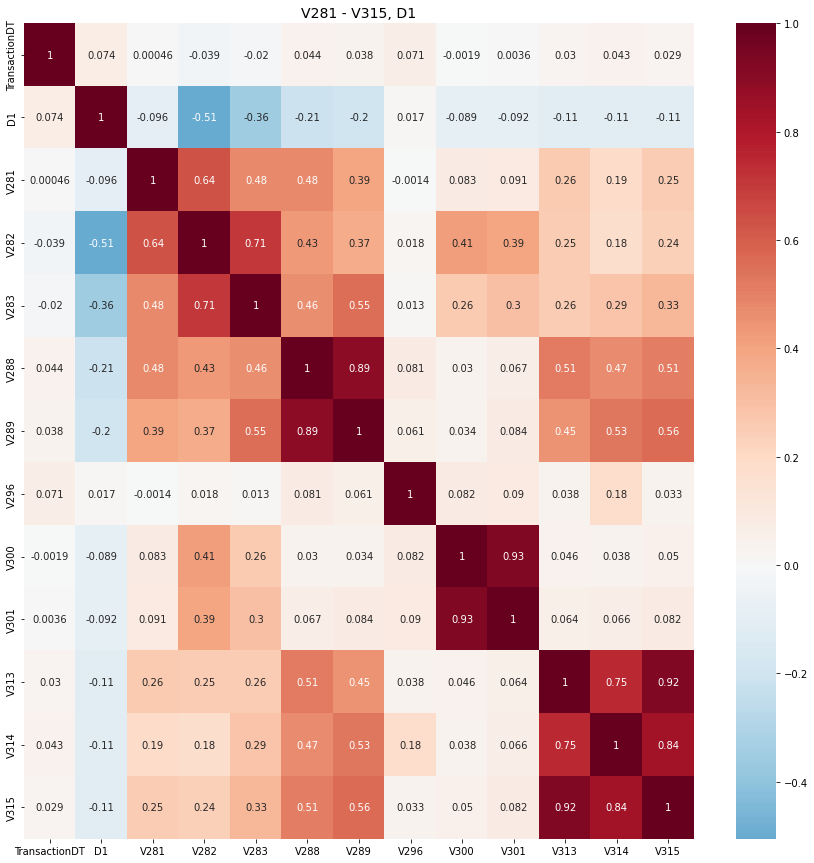

In [ ]:
make_corr(nans_groups[1269], 'V281 - V315, D1')

In [ ]:
reduce_group([[281, 282, 283], [288, 289], [296], [300, 301], [313, 314, 315]])

Use these features:  [283, 289, 296, 301, 314]


In [ ]:
make_corr(nans_groups[279287], 'V1 - V11, D11')

In [ ]:
reduce_group([[1], [2, 3], [4, 5], [6, 7, 8, 9], [10, 11]])

Use these features:  [1, 3, 4, 6, 11]


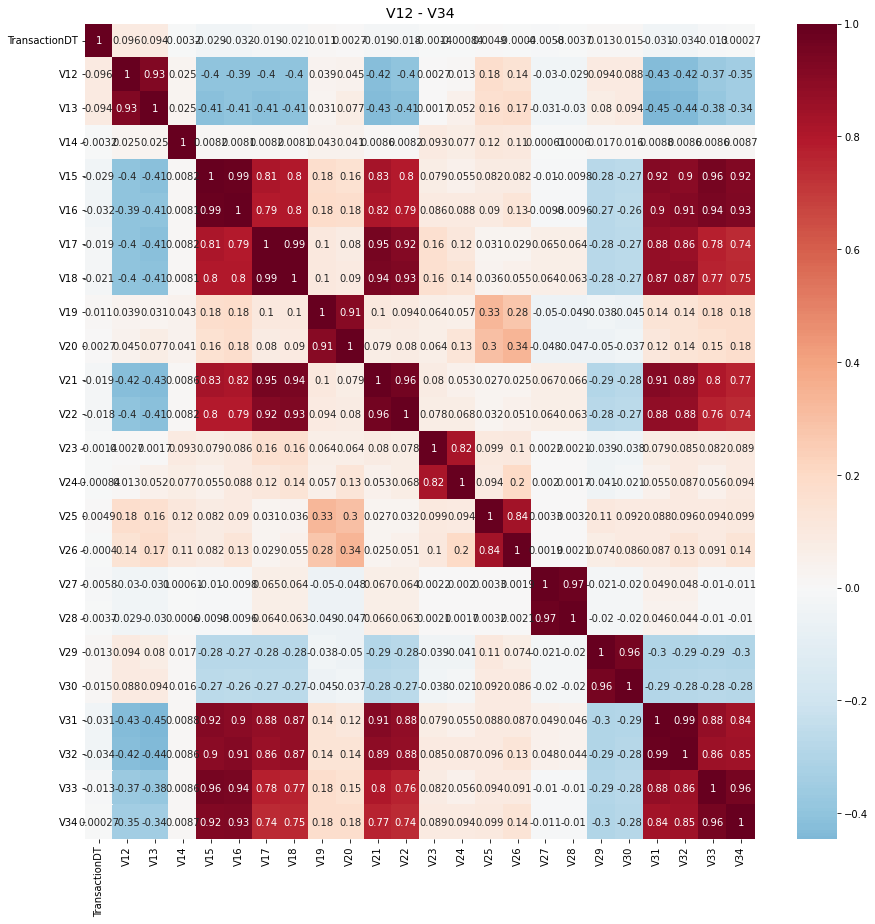

In [ ]:
make_corr(nans_groups[76073], 'V12 - V34')

In [ ]:
reduce_group([[12, 13], [14], [15, 16, 17, 18], [19, 20], [21, 22], [23, 24], [25, 26], [27, 28], [29, 30], [31, 32, 33, 34]])

Use these features:  [13, 14, 17, 20, 22, 23, 26, 27, 30, 32]


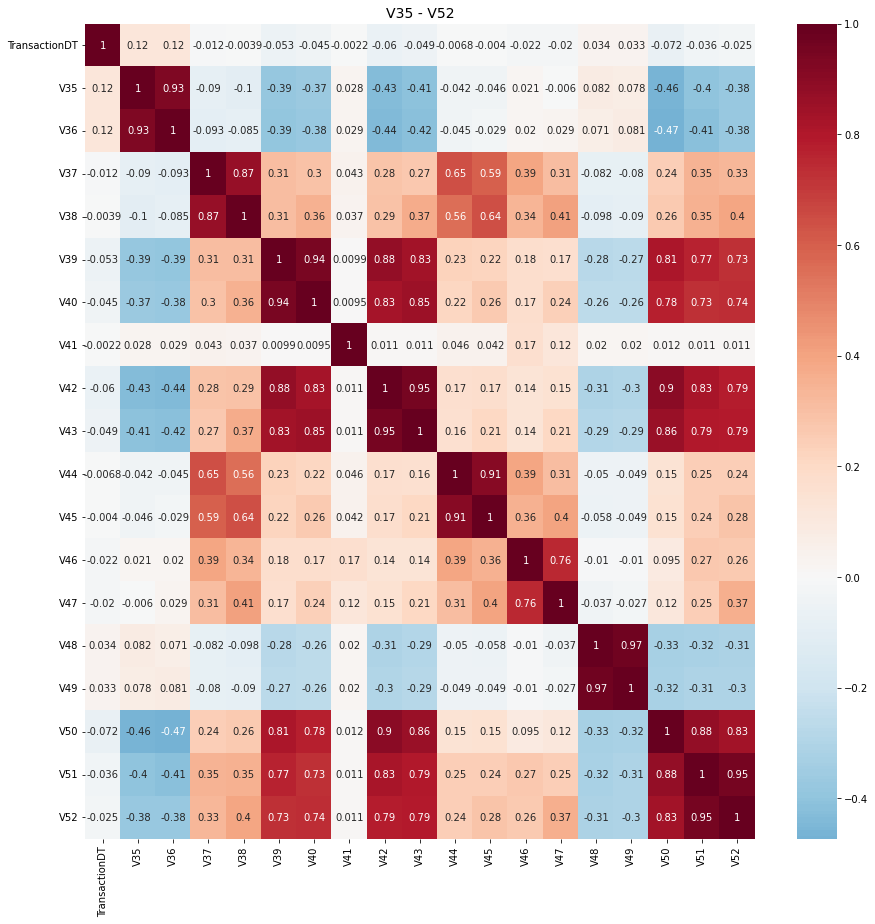

In [ ]:
make_corr(nans_groups[168969], 'V35 - V52')

In [ ]:
reduce_group([[35, 36], [37, 38], [39, 40], [41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51, 52]])

Use these features:  [36, 37, 40, 41, 42, 44, 47, 48, 52]


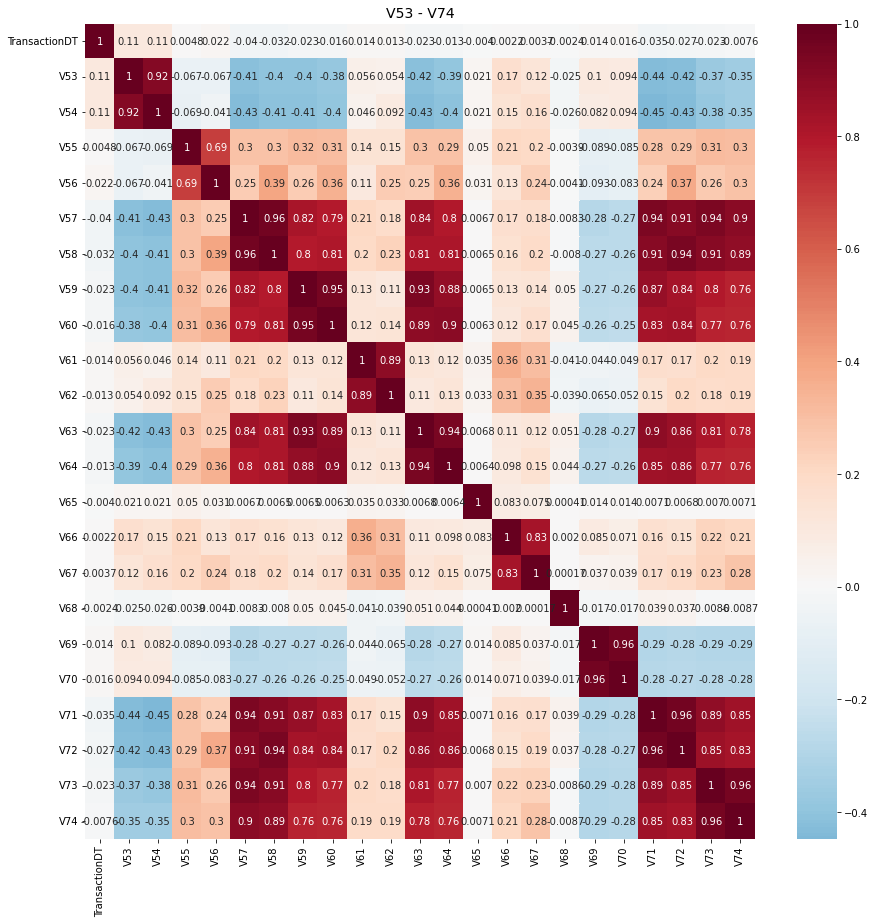

In [ ]:
make_corr(nans_groups[77096], 'V53 - V74')

In [ ]:
reduce_group([[53, 54], [55, 56], [57, 58, 59, 60], [61, 62], [63, 64], [65], [66, 67], [68], [69, 70], [71, 72, 73, 74]])

Use these features:  [54, 56, 59, 62, 63, 65, 67, 68, 70, 72]


In [ ]:
make_corr(nans_groups[89164], 'V75 - V94')

In [ ]:
reduce_group([[75, 76], [77, 78], [79, 80, 81], [82, 83], [84, 85], [86, 87], [88], [89], [90, 91], [92, 93, 94]])

Use these features:  [76, 78, 80, 82, 84, 86, 88, 89, 91, 92]


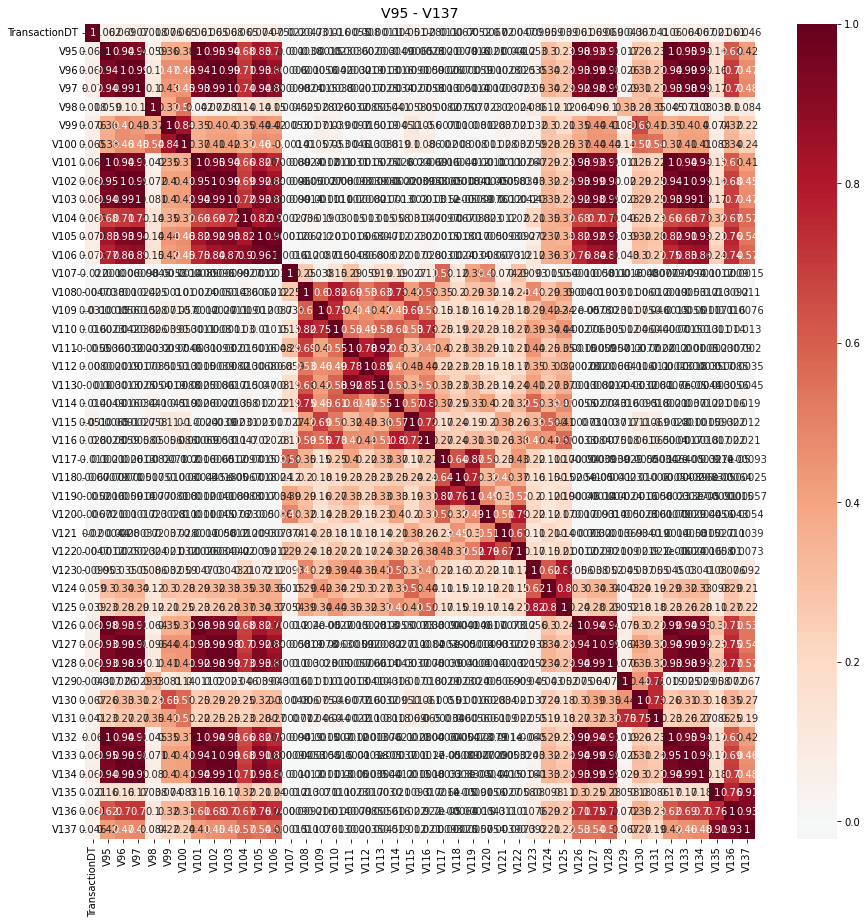

In [ ]:
make_corr(nans_groups[314], 'V95 - V137')

In [ ]:
reduce_group([[95, 96, 97], [98], [99, 100], [101, 102, 103, 104, 105, 106], [107], [108, 109, 110, 111, 112, 113, 114, 115, 116], [117, 118, 119],
              [120, 121, 122], [123, 124, 125], [126, 127, 128], [129], [130, 131], [132, 133, 134], [135, 136, 137]])

Use these features:  [96, 98, 99, 102, 107, 111, 117, 120, 123, 127, 129, 130, 133, 136]


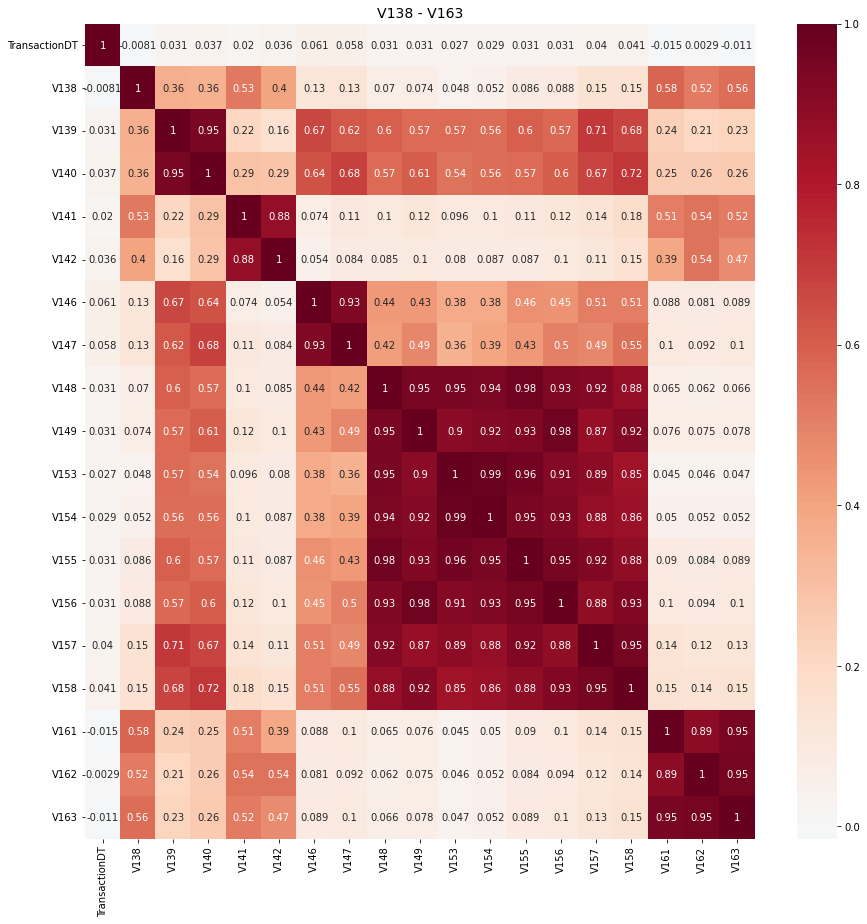

In [ ]:
make_corr(nans_groups[508595], 'V138 - V163')

In [ ]:
reduce_group([[138], [139, 140], [141, 142], [146, 147], [148, 149, 153, 154, 155, 156, 157, 158], [161, 162, 163]])

Use these features:  [138, 139, 142, 147, 155, 162]


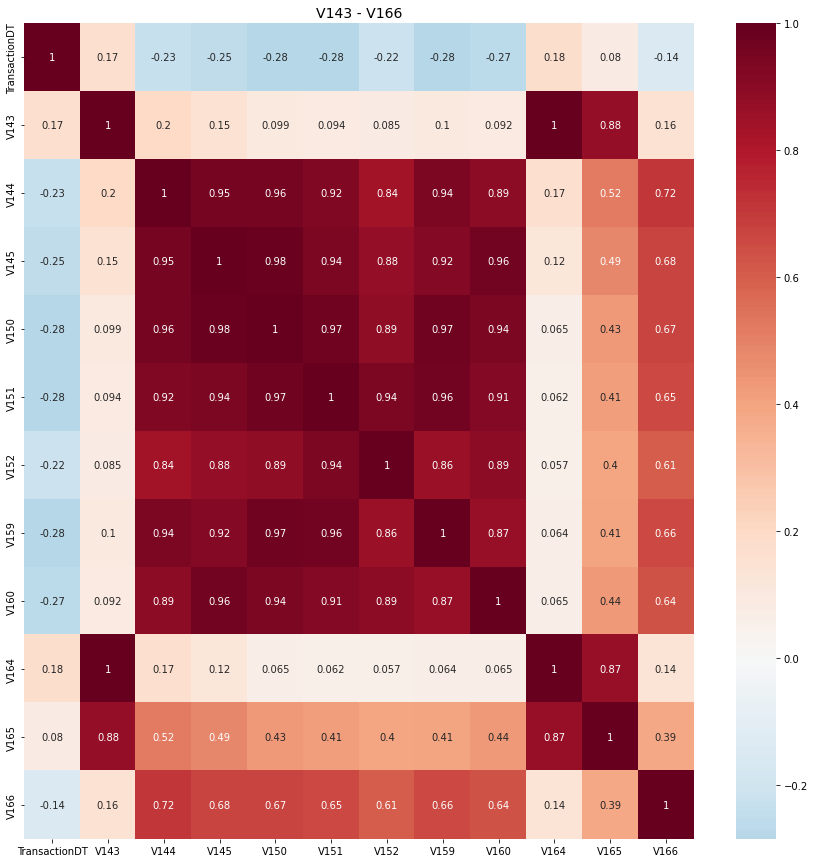

In [ ]:
make_corr(nans_groups[508589], 'V143 - V166')

In [ ]:
reduce_group([[143], [144, 145, 150, 151, 152, 159, 160], [164, 165], [166]])

Use these features:  [143, 160, 165, 166]


In [ ]:
make_corr(nans_groups[450909], 'V167 - V216')

In [ ]:
reduce_group([[167, 168], [172], [173], [176], [177, 178, 179, 181, 182, 183], [186, 187, 190, 191, 192, 193, 196, 199], [202, 203, 204], [205, 206],
              [207], [211, 212, 213], [214, 215, 216]])

Use these features:  [168, 172, 173, 176, 178, 187, 203, 205, 207, 212, 215]


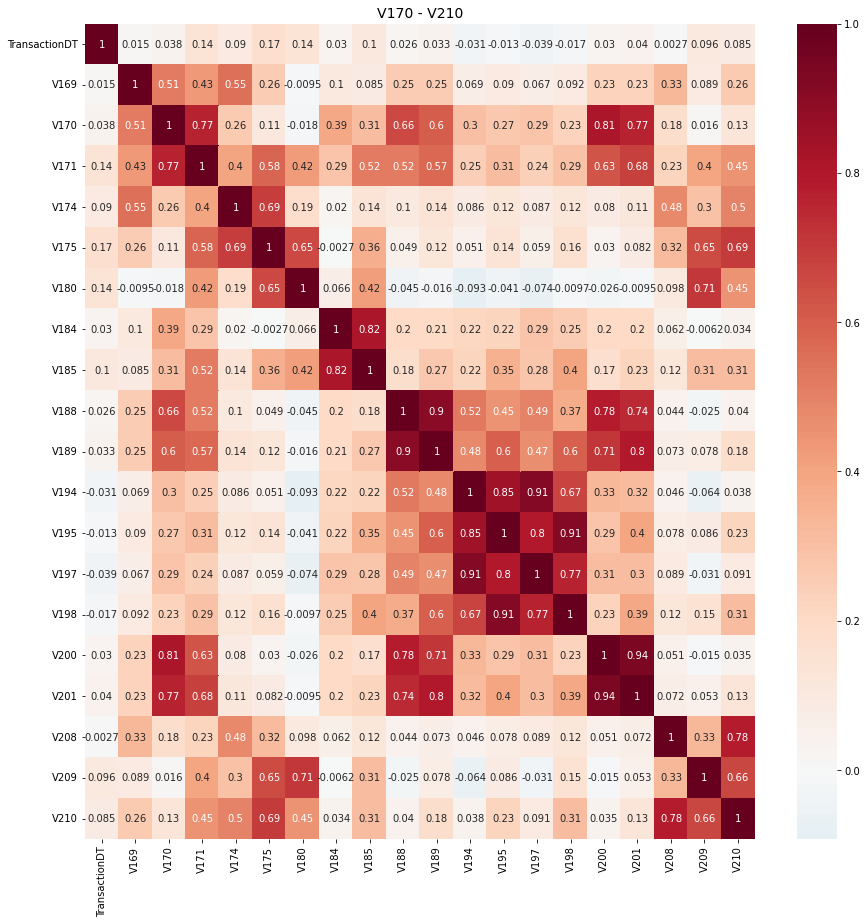

In [ ]:
make_corr(nans_groups[450721], 'V170 - V210')

In [ ]:
reduce_group([[169, 170, 171], [174, 175, 180], [184, 185], [188, 189], [194, 195, 197, 198], [200, 201], [208], [209, 210]])

Use these features:  [171, 180, 185, 188, 198, 201, 208, 209]


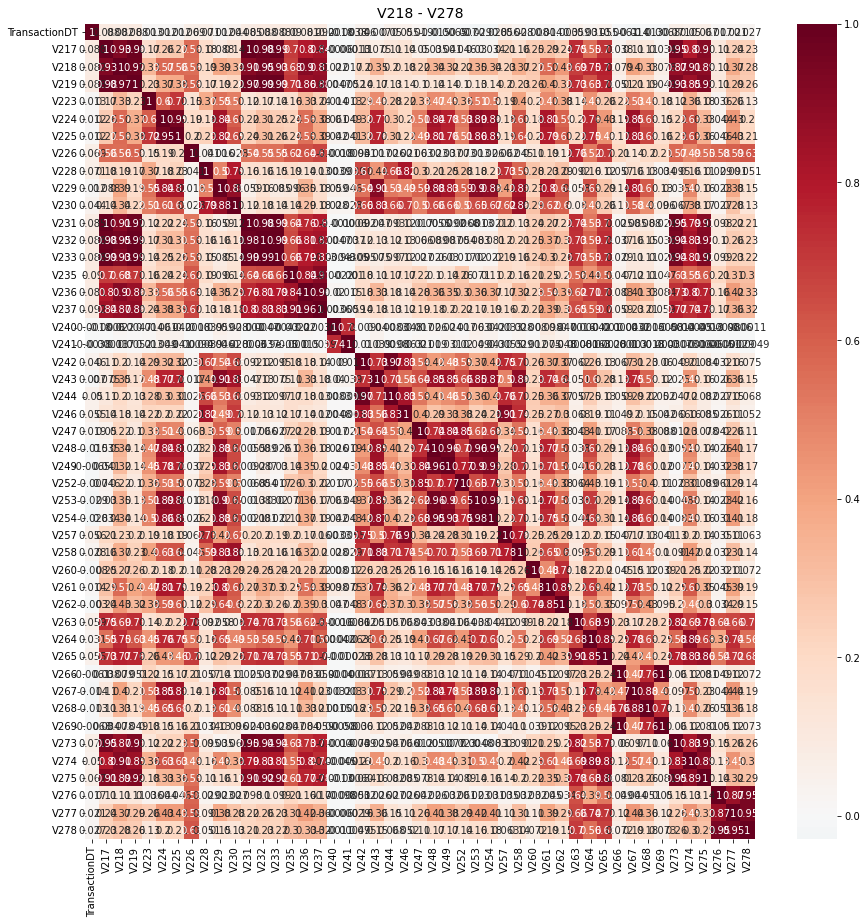

In [ ]:
make_corr(nans_groups[460110], 'V218 - V278')

In [ ]:
reduce_group([[217, 218, 219], [223, 224, 225], [226], [228, 229, 230], [231, 232, 233, 235, 236, 237], [240, 241], [242, 243, 244, 246], 
              [247, 248, 249, 252, 253, 254], [257, 258], [260], [261, 262], [263, 264, 265], [266], [267, 268, 269], [273, 274, 275], [276, 277, 278]])

Use these features:  [218, 224, 226, 229, 232, 240, 246, 253, 258, 260, 261, 264, 266, 267, 274, 277]


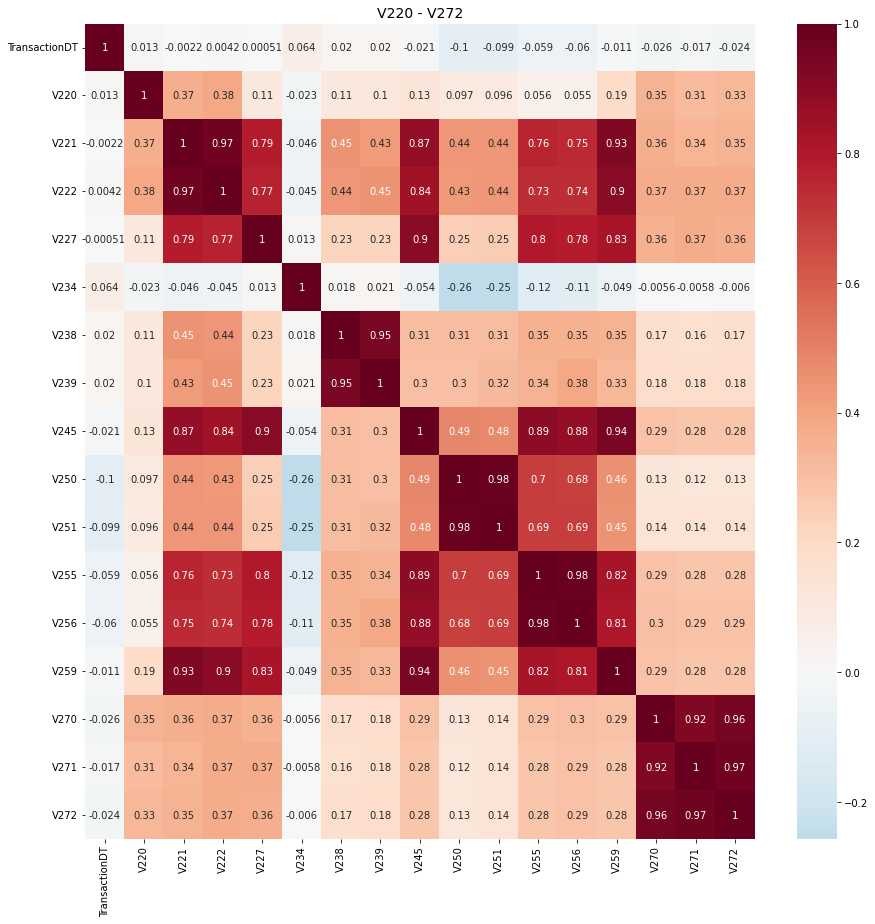

In [ ]:
make_corr(nans_groups[449124], 'V220 - V272')

In [ ]:
reduce_group([[220], [221, 222, 227], [234], [238, 239], [245], [250, 251], [255, 256, 259], [270, 271, 272]])

Use these features:  [220, 221, 234, 238, 245, 250, 259, 271]


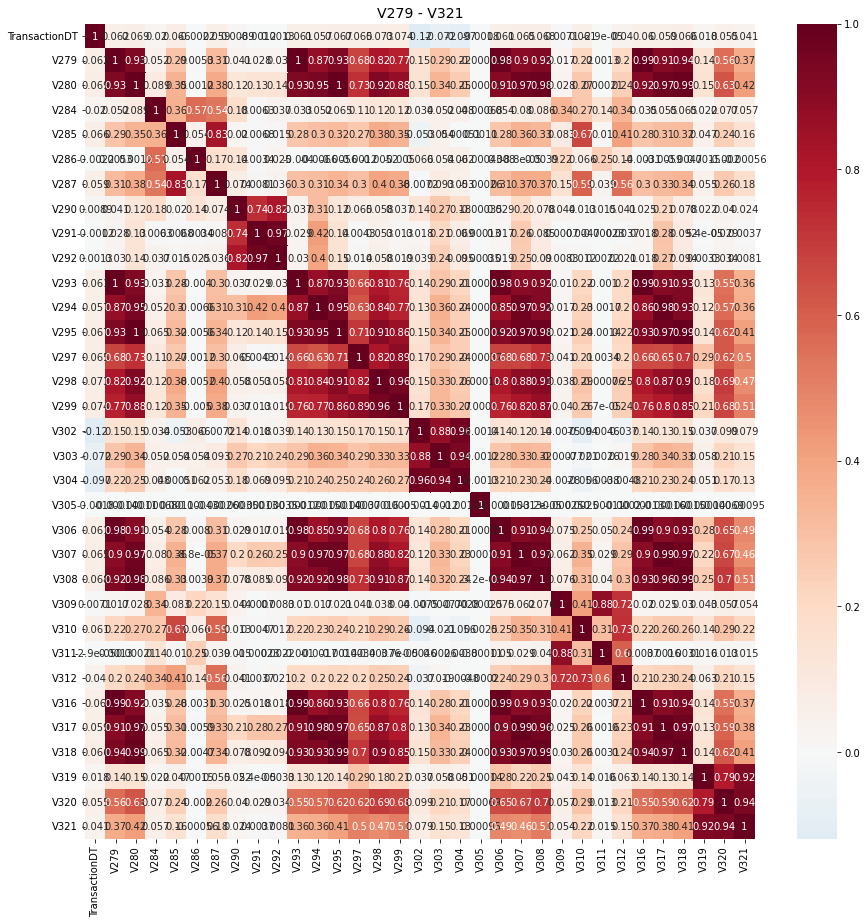

In [ ]:
make_corr(nans_groups[12], 'V279 - V321')

In [ ]:
reduce_group([[279, 280], [284], [285], [286], [287], [290, 291, 292], [293, 294, 295, 297, 298, 299], [302, 303, 304], [305], [306, 307, 308],
              [309], [310], [311, 312], [316, 317, 318], [319, 320, 321]])

Use these features:  [280, 284, 285, 286, 287, 291, 294, 303, 305, 307, 309, 310, 312, 317, 320]


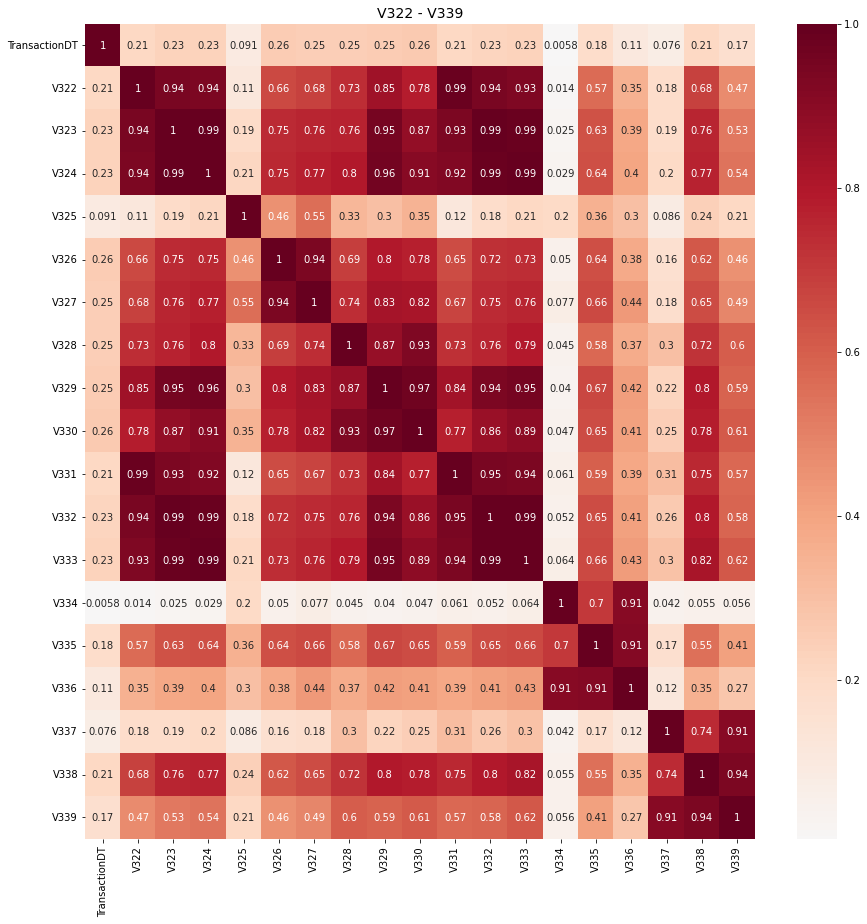

In [ ]:
make_corr(nans_groups[508189], 'V322 - V339')

In [ ]:
reduce_group([[322, 323, 324], [325], [326, 327, 328, 329, 330, 331, 332, 333], [334, 335, 336], [337, 338, 339]])

Use these features:  [323, 325, 332, 335, 338]


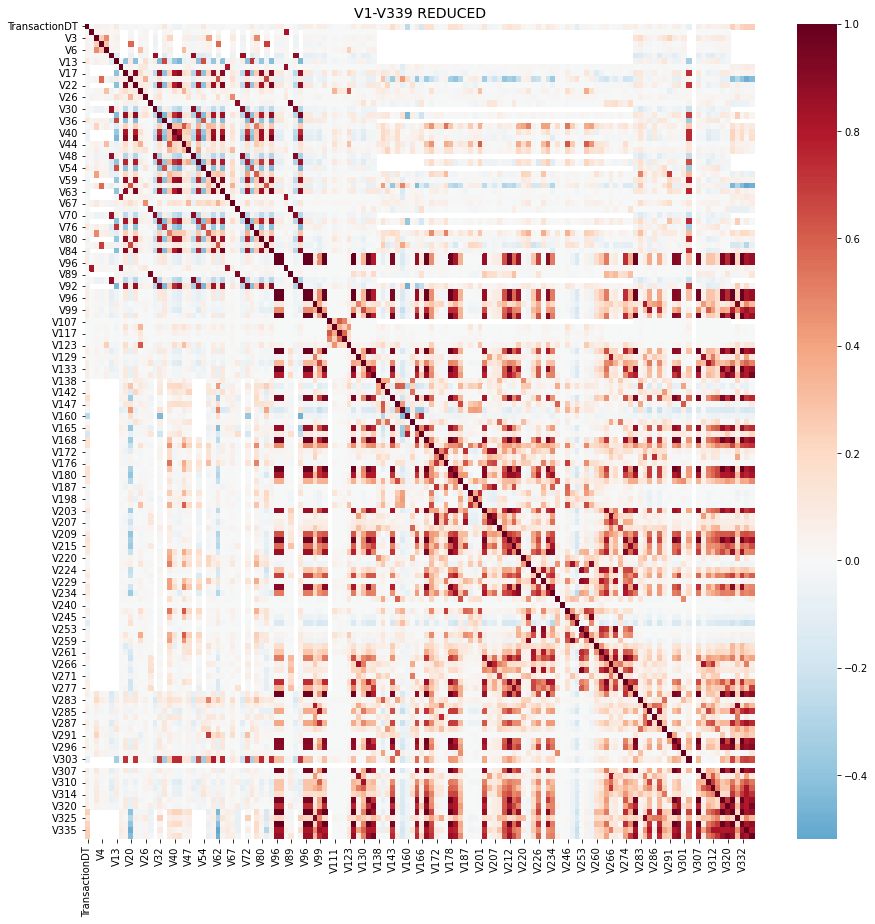

In [ ]:
cols = ['TransactionDT'] + ['V' + str(x) for x in v]
train2 = train[cols].sample(frac=0.2)
plt.figure(figsize=(15, 15))
sns.heatmap(train2[cols].corr(), cmap='RdBu_r', annot=False, center=0.0)
plt.title('V1-V339 REDUCED', fontsize=14)
plt.show()

In [ ]:
def reduce_group_M(grps, c='M'):
  use = []
  for g in grps:
    mx = 0
    vx = g[0]
    for gg in g:
      n = train[c + str(gg)].nunique()
      if n > mx:
        mx = n
        vx = gg
    use.append(vx)
  print('Use these features: ', use)

def reduce_group_C(grps, c='C'):
  use = []
  for g in grps:
    mx = 0
    vx = g[0]
    for gg in g:
      n = train[c + str(gg)].nunique()
      if n > mx:
        mx = n
        vx = gg
    use.append(vx)
  print('Use these features: ', use)

def reduce_group_D(grps, c='D'):
  use = []
  for g in grps:
    mx = 0
    vx = g[0]
    for gg in g:
      n = train[c + str(gg)].nunique()
      if n > mx:
        mx = n
        vx = gg
    use.append(vx)
  print('Use these features: ', use)

def reduce_group_id(grps, c='id_'):
  use = []
  for g in grps:
    mx = 0
    vx = g[0]
    for gg in g:
      n = train[c + str(gg)].nunique()
      if n > mx:
        mx = n
        vx = gg
    use.append(vx)
  print('Use these features: ', use)

In [ ]:
l = ['id_12','id_15','id_16','id_27','id_28','id_29','id_35','id_36','id_37','id_38', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
for i in l: 
  train[i] = train[i].map({'Unknown':0, 'NotFound':1, 'Found':2, 'New':3, 'F':0, 'T':1})

In [ ]:
for col in ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo', 'M4',
            'id_23', 'id_30', 'id_31', 'id_33', 'id_34']:
    print('Encoding', col)
    col_encoded = train[col].value_counts().to_dict()   
    train[col] = train[col].map(col_encoded)
    print(col_encoded)

Encoding ProductCD
{'W': 439670, 'C': 68519, 'R': 37699, 'H': 33024, 'S': 11628}
Encoding card4
{'visa': 384767, 'mastercard': 189217, 'american express': 8328, 'discover': 6651}
Encoding card6
{'debit': 439938, 'credit': 148986, 'debit or credit': 30, 'charge card': 15}
Encoding P_emaildomain
{'gmail.com': 228355, 'yahoo.com': 100934, 'hotmail.com': 45250, 'anonymous.com': 36998, 'aol.com': 28289, 'comcast.net': 7888, 'icloud.com': 6267, 'outlook.com': 5096, 'msn.com': 4092, 'att.net': 4033, 'live.com': 3041, 'sbcglobal.net': 2970, 'verizon.net': 2705, 'ymail.com': 2396, 'bellsouth.net': 1909, 'yahoo.com.mx': 1543, 'me.com': 1522, 'cox.net': 1393, 'optonline.net': 1011, 'charter.net': 816, 'live.com.mx': 749, 'rocketmail.com': 664, 'mail.com': 559, 'earthlink.net': 514, 'gmail': 496, 'outlook.es': 438, 'mac.com': 436, 'juno.com': 322, 'aim.com': 315, 'hotmail.es': 305, 'roadrunner.com': 305, 'windstream.net': 305, 'hotmail.fr': 295, 'frontier.com': 280, 'embarqmail.com': 260, 'web.de'

In [ ]:
train[['TransactionID', 'DeviceInfo', 'id_19', 'id_20', 'card1']].groupby(['card1']).count()

TransactionID  DeviceInfo  id_19  id_20
card1                                         
1000               1           1      1      1
1001               3           0      0      0
1004               5           3      3      3
1005               1           1      1      1
1006               3           3      3      3
...              ...         ...    ...    ...
18390             64           0      0      0
18391              1           0      0      0
18393              3           0      0      0
18395             11           0      0      0
18396              1           1      1      1

[13553 rows x 4 columns]

In [ ]:
train

TransactionID  isFraud  TransactionDT  ...  id_38  DeviceType  DeviceInfo
0             2987000        0          86400  ...    NaN         NaN         NaN
1             2987001        0          86401  ...    NaN         NaN         NaN
2             2987002        0          86469  ...    NaN         NaN         NaN
3             2987003        0          86499  ...    NaN         NaN         NaN
4             2987004        0          86506  ...    1.0     55645.0         9.0
...               ...      ...            ...  ...    ...         ...         ...
590535        3577535        0       15811047  ...    NaN         NaN         NaN
590536        3577536        0       15811049  ...    NaN         NaN         NaN
590537        3577537        0       15811079  ...    NaN         NaN         NaN
590538        3577538        0       15811088  ...    NaN         NaN         NaN
590539        3577539        0       15811131  ...    NaN         NaN         NaN

[590540 rows x 435 columns]

In [ ]:
reduce_group_C([[1, 2], [3], [4], [5], [6, 7, 8], [9], [10, 11, 12, 13, 14]])

Use these features:  [1, 3, 4, 5, 6, 9, 13]


In [ ]:
reduce_group_D([[1, 2], [5, 6, 7], [10, 11]])

Use these features:  [1, 6, 10]


In [ ]:
reduce_group_M([[2, 3]])

Use these features:  [2]


In [ ]:
reduce_group_id([[11, 28, 29], [15, 35, 36], [37, 38], [22, 23, 27]])

Use these features:  [11, 15, 37, 22]


In [ ]:
threshold = 0.98
    
# Absolute value correlation matrix
corr_matrix = train[train['isFraud'].notnull()].corr().abs()

# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [ ]:
print(to_drop)

['TransactionDT', 'C2', 'C6', 'C8', 'C10', 'C11', 'C12', 'C14', 'D2', 'D7', 'D12', 'V16', 'V18', 'V32', 'V50', 'V97', 'V101', 'V102', 'V103', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V143', 'V150', 'V154', 'V164', 'V167', 'V177', 'V178', 'V179', 'V182', 'V202', 'V204', 'V211', 'V212', 'V213', 'V219', 'V231', 'V232', 'V233', 'V236', 'V251', 'V256', 'V266', 'V269', 'V276', 'V278', 'V279', 'V280', 'V293', 'V295', 'V298', 'V306', 'V308', 'V316', 'V317', 'V318', 'V322', 'V323', 'V324', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'id_29']


## **SECOND METHOD: ADVERSARIAL VALIDATION**

In [ ]:
# If AUC ~ 0.5, the feature almost does not have any shift between train and test and is then definitely worth being kept
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
params = {'objective': 'binary', "boosting_type": "gbdt", "subsample": 1, "bagging_seed": 11, "metric": 'auc', 'random_state': 47}

def covariate_shift(feature):
  df_train = pd.DataFrame(data={feature: train[feature], 'isTest': 0})
  df_test = pd.DataFrame(data={feature: test[feature], 'isTest': 1})

  # Creating a single dataframe
  df = pd.concat([df_train, df_test], ignore_index=True)
    
  # Encoding if feature is categorical
  if str(df[feature].dtype) in ['object', 'category']:
    df[feature] = LabelEncoder().fit_transform(df[feature].astype(str))
    
  # Splitting it to a training and testing set
  X_train, X_test, y_train, y_test = train_test_split(df[feature], df['isTest'], test_size=0.33, random_state=47, stratify=df['isTest'])

  clf = lgb.LGBMClassifier(**params, num_boost_round=500)
  clf.fit(X_train.values.reshape(-1, 1), y_train)
  roc_auc =  roc_auc_score(y_test, clf.predict_proba(X_test.values.reshape(-1, 1))[:, 1])

  del df, X_train, y_train, X_test, y_test
  gc.collect();
    
  return roc_auc

In [ ]:
feat_to_drop = []
for i in final_features_1:
  if covariate_shift(i) >= 0.7:
    feat_to_drop.append(i)

In [ ]:
feat_to_drop

['TransactionDT', 'id_15', 'id_37', 'TransactionAmt']

In [ ]:
v = [1, 3, 4, 6, 11, 13, 14, 17, 20, 22, 23, 26, 27, 30, 36, 37, 40, 42, 44, 47, 48, 52, 54, 56, 59, 62, 63, 65, 67, 68, 70, 72, 76, 78, 80, 82,
     84, 96, 88, 89, 91, 92, 96, 98, 99, 107, 111, 117, 120, 123, 129, 130, 136, 138, 139, 142, 147, 155, 160, 162, 165, 166, 168, 171, 172,
     173, 176, 180, 185, 187, 188, 198, 201, 203, 205, 207, 208, 209, 215, 218, 220, 221, 224, 226, 229, 234, 238, 240, 246, 245, 250, 253, 258,
     259, 260, 261, 264, 267, 271, 274, 277, 283, 284, 285, 286, 287, 289, 291, 294, 296, 301, 303, 305, 307, 309, 310, 312, 314, 320,
     323, 325, 335, 338]
cols = ['TransactionDT'] + ['V' + str(x) for x in v]
cols += ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
         'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 
         'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
         'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
         'id_13', 'id_14', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
         'id_26', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_39']
final_features_1 = cols + ['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
                           'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']

## **TIME CONSISTENCY**

In [ ]:
import datetime
startdate = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
train['DT_M'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
train['DT_M'] = (train['DT_M'].dt.year - 2017)*12 + train['DT_M'].dt.month
prediction = train[train['DT_M']==train['DT_M'].max()].reset_index(drop=True)
train_df = train[train['DT_M']==train['DT_M'].min()].reset_index(drop=True)

In [ ]:
params = {'objective': 'binary', "boosting_type": "gbdt", "subsample": 1, "bagging_seed": 11, "metric": 'auc', 'random_state': 47}
features = []
for i in train_df.drop(['isFraud', 'DT_M'], axis=1).columns:
  print("# Column: ", i)
  clf = lgb.LGBMClassifier(**params, num_boost_round=500)
  clf.fit(train_df[i].values.reshape(-1, 1), train_df['isFraud'])
  score = roc_auc_score(prediction['isFraud'], clf.predict_proba(prediction[i].values.reshape(-1, 1))[:, 1])
  print(score)
  if score > 0.6:
    features.append(i)

# Column:  TransactionID
0.5
# Column:  TransactionDT
0.5
# Column:  TransactionAmt
0.6476336201410685
# Column:  ProductCD
0.6691557176449708
# Column:  card1
0.6123594397148747
# Column:  card2
0.6722753164586195
# Column:  card3
0.6455839983829796
# Column:  card4
0.48817612598490245
# Column:  card5
0.6130853652693048
# Column:  card6
0.5978681706230532
# Column:  addr1
0.6609497528921624
# Column:  addr2
0.6621201995940106
# Column:  dist1
0.5983136900414956
# Column:  dist2
0.536728303719102
# Column:  P_emaildomain
0.5969795604156751
# Column:  R_emaildomain
0.6827734437170774
# Column:  C1
0.6134395224021107
# Column:  C2
0.617756830401292
# Column:  C3
0.502194233235625
# Column:  C4
0.6971498520428244
# Column:  C5
0.6424230830685757
# Column:  C6
0.5595071350452996
# Column:  C7
0.6610892165691177
# Column:  C8
0.5773507639946944
# Column:  C9
0.6862520233985193
# Column:  C10
0.5693198095620717
# Column:  C11
0.584790842552962
# Column:  C12
0.6867571634364256
# Column:  C1

In [ ]:
features += ['isFraud', 'TransactionID', 'DT_M']

In [ ]:
print(features)

['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C7', 'C9', 'C12', 'C13', 'C14', 'D2', 'D3', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V21', 'V22', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V39', 'V40', 'V42', 'V43', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V79', 'V80', 'V81', 'V84', 'V85', 'V90', 'V91', 'V92', 'V93', 'V94', 'V169', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215'

In [ ]:
data_folder = './ML/Shareddrives/NCKH2021/Data/Truc/'
features_used.to_csv(f'{data_folder}features_to_used.csv')

In [ ]:
data_folder = './ML/Shareddrives/NCKH2021/Data/Truc/'
train[['TransactionID', 'TransactionAmt', 'V307', 'ProductCD', 'cardID_D1']].to_csv(f'{data_folder}check.csv')

In [ ]:
train['uid'] = train['card1'].astype(str)+'_'+train['card2'].astype(str)
test['uid'] = test['card1'].astype(str)+'_'+test['card2'].astype(str)

train['uid2'] = train['uid'].astype(str)+'_'+train['card3'].astype(str)+'_'+train['card4'].astype(str)
test['uid2'] = test['uid'].astype(str)+'_'+test['card3'].astype(str)+'_'+test['card4'].astype(str)

train['uid3'] = train['uid2'].astype(str)+'_'+train['addr1'].astype(str)+'_'+train['addr2'].astype(str)
test['uid3'] = test['uid2'].astype(str)+'_'+test['addr1'].astype(str)+'_'+test['addr2'].astype(str)

In [ ]:
train['check clients'] = np.where(train['uid3'].isin(test['uid3']), 1, 0)

In [ ]:
train[['TransactionID', 'id_19', 'id_20']]

TransactionID  id_19  id_20
0             2987000    NaN    NaN
1             2987001    NaN    NaN
2             2987002    NaN    NaN
3             2987003    NaN    NaN
4             2987004  542.0  144.0
...               ...    ...    ...
590535        3577535    NaN    NaN
590536        3577536    NaN    NaN
590537        3577537    NaN    NaN
590538        3577538    NaN    NaN
590539        3577539    NaN    NaN

[590540 rows x 3 columns]

In [ ]:
len(train[train['check clients']==1])

778

In [ ]:
# # FREQUENCY ENCODE: ADDR1, CARD1, CARD2, CARD3, P_EMAILDOMAIN
encode_FE(train, test, ['addr1', 'card1', 'card2', 'card3', 'P_emaildomain'])
# # COMBINE COLUMNS CARD1+ADDR1, CARD1+ADDR1+P_EMAILDOMAIN
encode_CB('card1', 'addr1', train, test)
encode_CB('card1_addr1', 'P_emaildomain', train, test)
# FREQUENCY ENCODE
encode_FE(train, test, ['card1_addr1', 'card1_addr1_P_emaildomain'])
# GROUP AGGREGATE
encode_AG(['TransactionAmt','D9','D10'], ['card1', 'card1_addr1', 'card1_addr1_P_emaildomain'], ['mean','std'], usena=True)

addr1_FE , card1_FE , card2_FE , card3_FE , P_emaildomain_FE , card1_addr1 , card1_addr1_P_emaildomain , card1_addr1_FE , card1_addr1_P_emaildomain_FE , 'TransactionAmt_card1_mean' , 'TransactionAmt_card1_std' , 'TransactionAmt_card1_addr1_mean' , 'TransactionAmt_card1_addr1_std' , 'TransactionAmt_card1_addr1_P_emaildomain_mean' , 'TransactionAmt_card1_addr1_P_emaildomain_std' , 'D9_card1_mean' , 'D9_card1_std' , 'D9_card1_addr1_mean' , 'D9_card1_addr1_std' , 'D9_card1_addr1_P_emaildomain_mean' , 'D9_card1_addr1_P_emaildomain_std' , 'D10_card1_mean' , 'D10_card1_std' , 'D10_card1_addr1_mean' , 'D10_card1_addr1_std' , 'D10_card1_addr1_P_emaildomain_mean' , 'D10_card1_addr1_P_emaildomain_std' , 

In [ ]:
train['day'] = train.TransactionDT / (24*60*60)
train['uid'] = train.card1_addr1.astype(str)+'_' + np.floor(train.day - train.D1).astype(str)

test['day'] = test.TransactionDT / (24*60*60)
test['uid'] = test.card1_addr1.astype(str) + '_' + np.floor(test.day - test.D1).astype(str)

In [ ]:
# FREQUENCY ENCODE UID
encode_FE(train, test, ['uid'])
# AGGREGATE 
encode_AG(['TransactionAmt','D4','D9','D10','D15'], ['uid'], ['mean','std'], fillna=True, usena=True)
# AGGREGATE
encode_AG(['C' + str(x) for x in range(1, 15) if x!=3],['uid'],['mean'], train, test, fillna=True, usena=True)
# AGGREGATE
encode_AG(['M' + str(x) for x in range(1, 10)], ['uid'], ['mean'], fillna=True, usena=True)
# AGGREGATE
encode_AG2(['P_emaildomain', 'dist1', 'DT_M', 'id_02'], ['uid'], train_df=train, test_df=test)
# AGGREGATE
encode_AG(['C14'],['uid'],['std'], train, test, fillna=True, usena=True)
# AGGREGATE 
encode_AG2(['C13','V314'], ['uid'], train_df=train, test_df=test)
# AGGREATE 
encode_AG2(['V127','V136','V309','V307','V320'], ['uid'], train_df=train, test_df=test)
# NEW FEATURE
train['outsider15'] = (np.abs(train.D1 - train.D15) > 3).astype('int8')
test['outsider15'] = (np.abs(test.D1- test.D15) >3 ).astype('int8')
print('outsider15')

In [ ]:
if True:
  feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,cols)), columns=['Value','Feature'])

  plt.figure(figsize=(20, 10))
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:50])
  plt.title('XGB96 Most Important')
  plt.tight_layout()
  plt.show()

In [ ]:
idxT = X_train.index[:3*len(X_train)//4]
idxV = X_train.index[3*len(X_train)//4:]

# **MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/ML')

Mounted at /content/ML


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024 ** 2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
known_train = reduce_mem_usage(pd.read_csv(r'./ML/Shareddrives/NCKH2021/Data/[ISI]Clients/known_train.csv'))

In [ ]:
known_train.drop(known_train.iloc[:, 0])

Unnamed: 0  TransactionID  TransactionDT  ...   V339  groupsUser  isFraud
0      503448        3490448       13194160  ...    NaN      group0        0
1      126312        3113312        2499303  ...    NaN      group0        0
2       29177        3016177         747534  ...  250.0      group0        0
3       99365        3086365        1994836  ...    NaN      group0        0
4      400234        3387234       10095409  ...    NaN      group0        0

[5 rows x 396 columns]

In [ ]:
import numpy as np
import pandas as pd
import gc, random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
known_train['TransactionAmt'] = np.log(known_train['TransactionAmt'])

# **DRAFT**

In [ ]:
# def corr1(col):
#   num_vars = [f for f in train.columns if train[f].dtype != 'object']
#   corrs = train[num_vars].corrwith(train[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column', 0:'Correlation with ' + col}, axis=1)
#   trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
#   print(trx)

In [ ]:
# train[(train.isFraud==1) & (train.D1minusday==78)][['card1','card2','card3',
# 'card4','card5','card6','addr1', 'addr2', 'dist1', 'dist2','P_emaildomain','R_emaildomain','TransactionDTday']]

In [ ]:
# print(to_drop_train_tr)

['TransactionDT', 'C2', 'C6', 'C8', 'C10', 'C11', 'C12', 'C14', 'D2', 'D7', 'D12', 'V16', 'V18', 'V32', 'V50', 'V97', 'V101', 'V102', 'V103', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V143', 'V150', 'V154', 'V164', 'V167', 'V177', 'V178', 'V179', 'V182', 'V202', 'V204', 'V211', 'V212', 'V213', 'V219', 'V231', 'V232', 'V233', 'V236', 'V251', 'V256', 'V266', 'V269', 'V276', 'V278', 'V279', 'V280', 'V293', 'V295', 'V298', 'V306', 'V308', 'V316', 'V317', 'V318', 'V322', 'V323', 'V324', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333']


In [ ]:
# print(to_drop_train_id)

['TransactionDT']


In [ ]:
def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan) 
c_cols = [c for c in train_transaction if c[0] == 'C']
train_transaction[c_cols].head()

In [ ]:
result_dict_lgb = train_model_classification(X=X, X_test=X_test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', 
                                             plot_feature_importance=True, verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', n_jobs=-1)

In [ ]:
# lst_id = ['id_12','id_15','id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
# for i in lst_id:
#     k = train_id.groupby([i,'isFraud']).apply(lambda x: x[i].count()).reset_index(name='Count')
#     print(k)
#     fig = px.bar(k, x=i, y='Count', color='isFraud', width=600, height=500)
#     fig.update_traces(width=.4)
#     fig.show()
# 'C'+str(x) for x in range(1,15) if x!=3

In [ ]:
plt.hist(train['TransactionDT'], label='train', edgecolor='black');
plt.hist(test['TransactionDT'], label='test', edgecolor='black');
plt.legend();
plt.title('Distribution of transaction dates')

In [ ]:
train_id

TransactionID  id_01  ...  DeviceType                          DeviceInfo
0             2987004    0.0  ...      mobile       SAMSUNG SM-G892A Build/NRD90M
1             2987008   -5.0  ...      mobile                          iOS Device
2             2987010   -5.0  ...     desktop                             Windows
3             2987011   -5.0  ...     desktop                                 NaN
4             2987016    0.0  ...     desktop                               MacOS
...               ...    ...  ...         ...                                 ...
144228        3577521  -15.0  ...      mobile             F3111 Build/33.3.A.1.97
144229        3577526   -5.0  ...      mobile                 A574BL Build/NMF26F
144230        3577529  -20.0  ...      mobile  Moto E (4) Plus Build/NMA26.42-152
144231        3577531   -5.0  ...     desktop                               MacOS
144232        3577534  -45.0  ...      mobile         RNE-L03 Build/HUAWEIRNE-L03

[144233 rows x 41 columns]